# Import Libraries

In [1]:
# Install necessary packages
!pip install calmap duckdb sweetviz pygwalker xgboost pydot visualkeras graphviz lifelines pyarrow feather-format

In [2]:
# Basic libraries
import numpy as np
from numpy import inf
import pandas as pd
import warnings
from datetime import datetime

# Machine Learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, fbeta_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score,recall_score

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import calmap

# Other libraries
import requests
import tabulate
from scipy import stats
from scipy.stats import norm
import duckdb
import time
colors = ['#66b3ff', '#ff9999']

# Plotly offline mode
pyo.init_notebook_mode(connected=True)

# Set the warning filter to ignore
warnings.filterwarnings("ignore")

# Set the display options
pd.options.display.max_columns = None

# Set the color palette
sns.set_palette(sns.color_palette())

# Set a random seed at the beginning of your script
np.random.seed(42)


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE, SelectPercentile
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import chi2

# Explore The Data 

## Convert .csv files into pandas DataFrame.

In [4]:
# Reads a CSV file into a pandas DataFrame
dataframe = pd.read_csv("C:\\Users\\lekho\\Work\\FraudDetection\\Data\\data_july_dec2023.csv")
datalock = pd.read_csv("C:\\Users\\lekho\\OneDrive\Máy tính\\fizo-it-team\\Score Ver 4.0\\lock_user.csv")
fpd_accum = pd.read_csv("C:\\Users\\lekho\\OneDrive\Máy tính\\fizo-it-team\\Score Ver 4.0\\fpd_accum.csv")
# Generating the dataframe
df = pd.DataFrame(dataframe)
df_lock = pd.DataFrame(datalock)
fpd_accum = pd.DataFrame(fpd_accum)


## Check for NA value

In [5]:
# Glimpse NA % df
data_df = df
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,velocity_60d,mean_distance_sellOrg7d,velocity_28d,velocity_14d,mean_distance_sellOrg14d,velocity_7d,velocity_3d,mean_distance_sellOrg28d,region_tier,Single_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,MONTH,Single_cnt_28d,idcard_rej_cnt_7d,amt30_cnt_3d,amt30_cnt_7d,idcard_rej_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,idcard_rej_cnt_3d,avg_distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_7d,amt30_cnt_28d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerProvince_locationCreate_km_28d,amt30_cnt_14d,nonViettel_cnt_14d,nonViettel_cnt_3d,nonViettel_cnt_7d,acceleration_28d,acceleration_14d,acceleration_7d,acceleration_3d,BAD_lock,refphone_cnt_28d,refphone_cnt_14d,refphone_cnt_7d,refphone_cnt_3d,idcard_cnt_28d,idcard_cnt_14d,idcard_cnt_7d,idcard_cnt_3d,male_cnt_28d,male_cnt_14d,male_cnt_7d,male_cnt_3d,nonViettel_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,approve_cnt_14d,outSideAppPermanent_cnt_7d,outSideApp_cnt_28d,outSideApp_cnt_14d,outSideApp_cnt_7d,stable_and_self_employed_rate_cnt_28d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_3d,approve_cnt_28d,approve_cnt_7d,outSideAppPermanent_cnt_28d,approve_cnt_3d,app_cnt_60d,app_cnt_28d,app_cnt_14d,app_cnt_7d,app_cnt_3d,app_cnt_1d,loan_date,vnpostUserName,outSideAppPermanent_cnt_14d,term_permanent_flag_cnt_7d,vnpostProvinceName,createTimeTrigger_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_7d,addressTrigger_cnt_28d,addressTrigger_cnt_14d,addressTrigger_cnt_7d,emailTrigger_cnt_28d,emailTrigger_cnt_14d,emailTrigger_cnt_7d,createTimeTrigger_cnt_28d,createTimeTrigger_cnt_14d,userTriggerNew_cnt_28d,term_permanent_flag_cnt_14d,userTriggerNew_cnt_14d,userTriggerNew_cnt_7d,phoneTrigger_cnt_28d,phoneTrigger_cnt_14d,phoneTrigger_cnt_7d,idTrigger_cnt_28d,idTrigger_cnt_14d,idTrigger_cnt_7d,term_permanent_flag_cnt_28d,acceleration_60d
Total,158603.000000,122939.00000,122728.000000,114274.000000,113058.000000,112795.000000,110674.000000,106800.000000,85.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,87.472769,67.80335,67.686979,63.024427,62.353778,62.208728,61.038954,58.902364,0.046879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Glimpse NA % datalock
data_df = datalock
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,lock_date,UserName,lock_time
Total,0.0,0.0,0.0
Percent,0.0,0.0,0.0


In [7]:
# Glimpse NA % fpd_accum
data_df = fpd_accum
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,vnpostUserName,day,cumulative_app,cumulative_fpd,cumulative_fpd_rate
Total,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0


## Merge dataframes together

Glimpse Dataframe

In [8]:
# Function to display the first row of a dataframe
def display_first_row(df, name):
    print(f"First row of {name}:")
    display(df.head(1))
    print("\n")  # Adds a newline for better readability between outputs

# List of tuples containing the dataframes and their respective names
dataframes = [(df, 'df'), (df_lock, 'df_lock'), (fpd_accum, 'fpd_accum')]

# Loop through each dataframe and display its first row
for dataframe, name in dataframes:
    display_first_row(dataframe, name)

First row of df:


,MONTH,vnpostProvinceName,region_tier,vnpostUserName,loan_date,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg14d,mean_distance_sellOrg7d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_28d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,BAD_lock,velocity_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,acceleration_3d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d
0,2022-11,Bưu điện TP Hà Nội,TIER_3,huongptm01,2022-11-23T00:00:00Z,18,53,120,124,124,124,5,13,14,14,52,114,117,117,97,97,97,101,101,101,21,21,21,2,2,2,0,0,0,20,20,20,20,20,20,0,0,0,7,7,7,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,99,101,101,14,33,35,35,10,20,20,20,22,42,42,42,35,67,69,69,52,114,117,117,52,113,116,116,0,1.0,1.058824,2.0,4.5,9.0,-11.666667,-14.571429,-7.571429,-3.785714,-1.766667




First row of df_lock:


,lock_date,UserName,lock_time
0,2023-07-01T00:00:00Z,0344767838,1




First row of fpd_accum:


,vnpostUserName,day,cumulative_app,cumulative_fpd,cumulative_fpd_rate
0,00099806,2022-10-05T00:00:00Z,0,0,0.0


### Map the Lock dataframe with the performance dataframe

In [9]:
# Drop Province
df = df.drop(['vnpostProvinceName'], axis=1)

# Step 1: Convert columns to datetime
df['loan_date'] = pd.to_datetime(df['loan_date'])
df_lock['lock_date'] = pd.to_datetime(df_lock['lock_date'])
fpd_accum['day'] = pd.to_datetime(fpd_accum['day'])

# Prepare for the customized left join
result_rows = []

# Step 2: Iterate through each row in the 'df' dataframe
for _, row in df.iterrows():
    start_date = row['loan_date'] - pd.Timedelta(days=30)
    end_date = row['loan_date'] + pd.Timedelta(days=30)

    mask = (
        (df_lock['lock_date'] >= start_date) & 
        (df_lock['lock_date'] <= end_date) & 
        (df_lock['UserName'] == row['vnpostUserName'])
    )
    filtered_df_lock = df_lock.loc[mask]

    # If there are matches, we combine the data
    if not filtered_df_lock.empty:
        for _, matched_row in filtered_df_lock.iterrows():
            combined_data = row.combine_first(matched_row)
            result_rows.append(combined_data)
    else:
        # No match, keep the original row
        result_rows.append(row)

# Step 3: Create the combined dataframe
result_df = pd.DataFrame(result_rows)

# Step 4: Create the 'BAD' column based on 'lock_time' and FPD conditions
def check_bad_conditions(row):
    # Conditions related to 'lock_time'
    lock_time_condition = row['lock_time'] > 0 if row['lock_time'] is not None else False
    
    # Conditions related to FPD (First Payment Default)
    fpd_conditions = [
    ]

    # If any of the conditions are met, mark as 'BAD'
    return 1 if lock_time_condition or any(fpd_conditions) else 0

result_df['BAD'] = result_df.apply(check_bad_conditions, axis=1)

# Optional: If you wish to remove certain columns like 'lock_date' and 'UserName', you can do so.
final_df = result_df.drop(['lock_date', 'UserName'], axis=1)

df = final_df

In [10]:
fpd_accum.rename(columns={'day': 'loan_date'}, inplace=True)
merged_df = pd.merge(final_df, fpd_accum, on=['vnpostUserName', 'loan_date'], how='left')
merged_df['loan_date'] = pd.to_datetime(merged_df['loan_date']).dt.strftime('%d-%m-%Y')
merged_df.head(1)

,MONTH,region_tier,vnpostUserName,loan_date,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg14d,mean_distance_sellOrg7d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_28d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,BAD_lock,velocity_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,acceleration_3d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate
0,2022-11,TIER_3,huongptm01,23-11-2022,18,53,120,124,124,124,5,13,14,14,52,114,117,117,97,97,97,101,101,101,21,21,21,2,2,2,0,0,0,20,20,20,20,20,20,0,0,0,7,7,7,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,99,101,101,14,33,35,35,10,20,20,20,22,42,42,42,35,67,69,69,52,114,117,117,52,113,116,116,0,1.0,1.058824,2.0,4.5,9.0,-11.666667,-14.571429,-7.571429,-3.785714,-1.766667,NaN,0,15.0,1.0,6.666667


### Define 'BAD'

In [11]:
def set_bad_flag(row):
    # Existing condition related to 'lock_time'.
    lock_time_condition = row['lock_time'] > 0 if 'lock_time' in row and row['lock_time'] is not None else False
    
    # New condition based on 'cumulative_fpd_rate'.
    fpd_rate_condition = row['cumulative_fpd_rate'] >= 5 if 'cumulative_fpd_rate' in row and row['cumulative_fpd_rate'] is not None else False

    # If any of the conditions are met, the entry is "BAD".
    return 1 if lock_time_condition or fpd_rate_condition else 0

In [12]:
# Apply the function to each row in 'merged_df'
merged_df['BAD'] = merged_df.apply(set_bad_flag, axis=1)
df = merged_df
df.head()

,MONTH,region_tier,vnpostUserName,loan_date,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg14d,mean_distance_sellOrg7d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_28d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,BAD_lock,velocity_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,acceleration_3d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate
0,2022-11,TIER_3,huongptm01,23-11-2022,18,53,120,124,124,124,5,13,14,14,52,114,117,117,97,97,97,101,101,101,21,21,21,2,2,2,0,0,0,20,20,20,20,20,20,0,0,0,7,7,7,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,47,99,101,101,14,33,35,35,10,20,20,20,22,42,42,42,35,67,69,69,52,114,117,117,52,113,116,116,0,1.00,1.058824,2.0,4.5,9.0,-11.666667,-14.571429,-7.571429,-3.785714,-1.766667,NaN,1,15.0,1.0,6.666667
1,2023-11,TIER_3,10.3237,16-11-2023,7,20,37,64,127,127,2,2,2,4,0,0,0,0,1,3,4,13,22,36,12,20,33,0,0,0,0,0,0,0,1,1,0,0,0,3,7,15,2,2,2,13.437500,12.783784,14.157480,2838.0,5160.0,10788.0,0.0,0.0,0.0,3.652510,6.640927,13.884170,0.0,0.0,0.0,18,35,62,121,1,6,11,16,19,32,54,106,9,15,30,55,12,22,39,67,20,37,64,126,20,37,64,126,0,1.00,1.400000,1.4,1.4,3.5,-4.333333,-4.285714,-4.071429,-4.285714,-2.000000,NaN,0,NaN,NaN,NaN
2,2022-10,TIER_3,hienltd01,20-10-2022,0,0,0,1,5,5,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,3,0,0,1,5,0,0,1,5,0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.071429,-0.178571,-0.083333,NaN,0,1.0,0.0,0.000000
3,2023-07,TIER_3,nganltk01,13-07-2023,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,26.000000,0.0,0.0,104.0,0.0,0.0,0.0,0.000000,0.000000,20.800000,0.0,0.0,0.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,0,2,0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,-0.071429,-0.033333,NaN,0,2.0,0.0,0.000000
4,2023-11,TIER_3,10.3019,14-11-2023,7,12,41,96,145,145,1,5,10,13,0,0,0,0,2,6,9,12,22,37,10,18,32,0,2,2,0,0,0,0,0,1,0,0,0,2,2,2,0,0,0,15.458333,15.170732,15.423611,1244.0,2968.0,4442.0,0.0,0.0,0.0,4.274914,10.199313,15.264605,0.

In [13]:
# Create a list of FPD related columns to drop
fpd_cols_to_drop = [col for col in df.columns if 'FPD' in col]

# Drop those columns
df = df.drop(fpd_cols_to_drop, axis=1)

In [14]:
# Characteristic variable isolation
# Fill 0
spe_num = df.select_dtypes(['float', 'int']).columns
df[spe_num] = df[spe_num].apply(lambda x: x.fillna(0), axis=0)
# Fill missing values
spe_obj = df.select_dtypes(['object']).columns
df[spe_obj] = df[spe_obj].apply(lambda x: x.fillna('Null'), axis=0)

In [15]:
df = df.drop(['cumulative_app',	'cumulative_fpd','cumulative_fpd_rate', 'lock_time'], axis=1)

In [16]:
cols_to_drop = df.filter(like='TIER').columns
df = df.drop(cols_to_drop, axis=1)

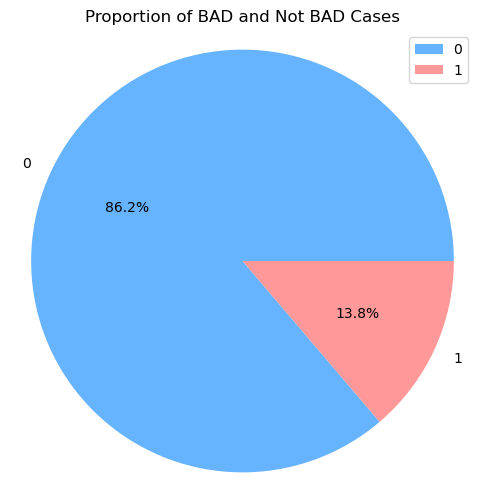

In [17]:
# Creating a copy
counts = df['BAD'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.axis('equal')
plt.title('Proportion of BAD and Not BAD Cases')
plt.legend()
plt.show()

In [18]:
# from sklearn.preprocessing import RobustScaler

numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# scaler = RobustScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

loan_data = df
data = df

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181317 entries, 0 to 181316
Data columns (total 100 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MONTH                                              181317 non-null  object 
 1   region_tier                                        181317 non-null  object 
 2   vnpostUserName                                     181317 non-null  object 
 3   loan_date                                          181317 non-null  object 
 4   app_cnt_1d                                         181317 non-null  int64  
 5   app_cnt_3d                                         181317 non-null  int64  
 6   app_cnt_7d                                         181317 non-null  int64  
 7   app_cnt_14d                                        181317 non-null  int64  
 8   app_cnt_28d                                        181317 non-null  int64

In [20]:
df.describe()

,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg14d,mean_distance_sellOrg7d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_28d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,BAD_lock,velocity_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,acceleration_3d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,BAD
count,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.00000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000,181317.000000
mean,0.833430,2.194256,4.649685,8.293541,14.586768,14.586768,0.426033,0.913582,1.642847,2.918314,1.078575,2.202838,3.797724,6.552585,0.403415,0.655256,1.049003,1.013264,1.699228,2.732910,0.722900,1.233657,1.998748,0.038910,0.069712,0.123833,0.013589,0.024912,0.044954,0.057386,0.093538,0.144074,0.044745,0.075128,0.129332,0.425906,0.742583,1.257179,0.08617,0.146186,0.233591,1.863726,1.679750,1.970321,42.111286,71.967030,115.739765,23.443097,39.354275,61.674973,0.702815,1.129709,1.798736,0.932992,1.553001,2.585714,1.53685

# Time Factor

In [21]:
# Convert the date column to a datetime type if it isn't already
df['loan_date'] = pd.to_datetime(df['loan_date'])

# Extracting features
df['day_of_week'] = df['loan_date'].dt.dayofweek
df['day_of_month'] = df['loan_date'].dt.day
df['month'] = df['loan_date'].dt.month
df['quarter'] = df['loan_date'].dt.quarter
df['year'] = df['loan_date'].dt.year


# Temporal Analysis

In [22]:
# Sort by 'vnpostUserName' and 'loan_date'
df = df.sort_values(by=['vnpostUserName', 'loan_date'])

# Calculate the difference in days since the last activity
df['days_since_last_activity'] = df.groupby('vnpostUserName')['loan_date'].diff().dt.days

# Fill NaN values with some default value or 0 (since for the first record of each user, there won't be a previous activity)
df['days_since_last_activity'].fillna(0, inplace=True)

In [23]:
# Set the datetime column as the index if you want to perform time-series analysis
df.set_index('loan_date', inplace=True)

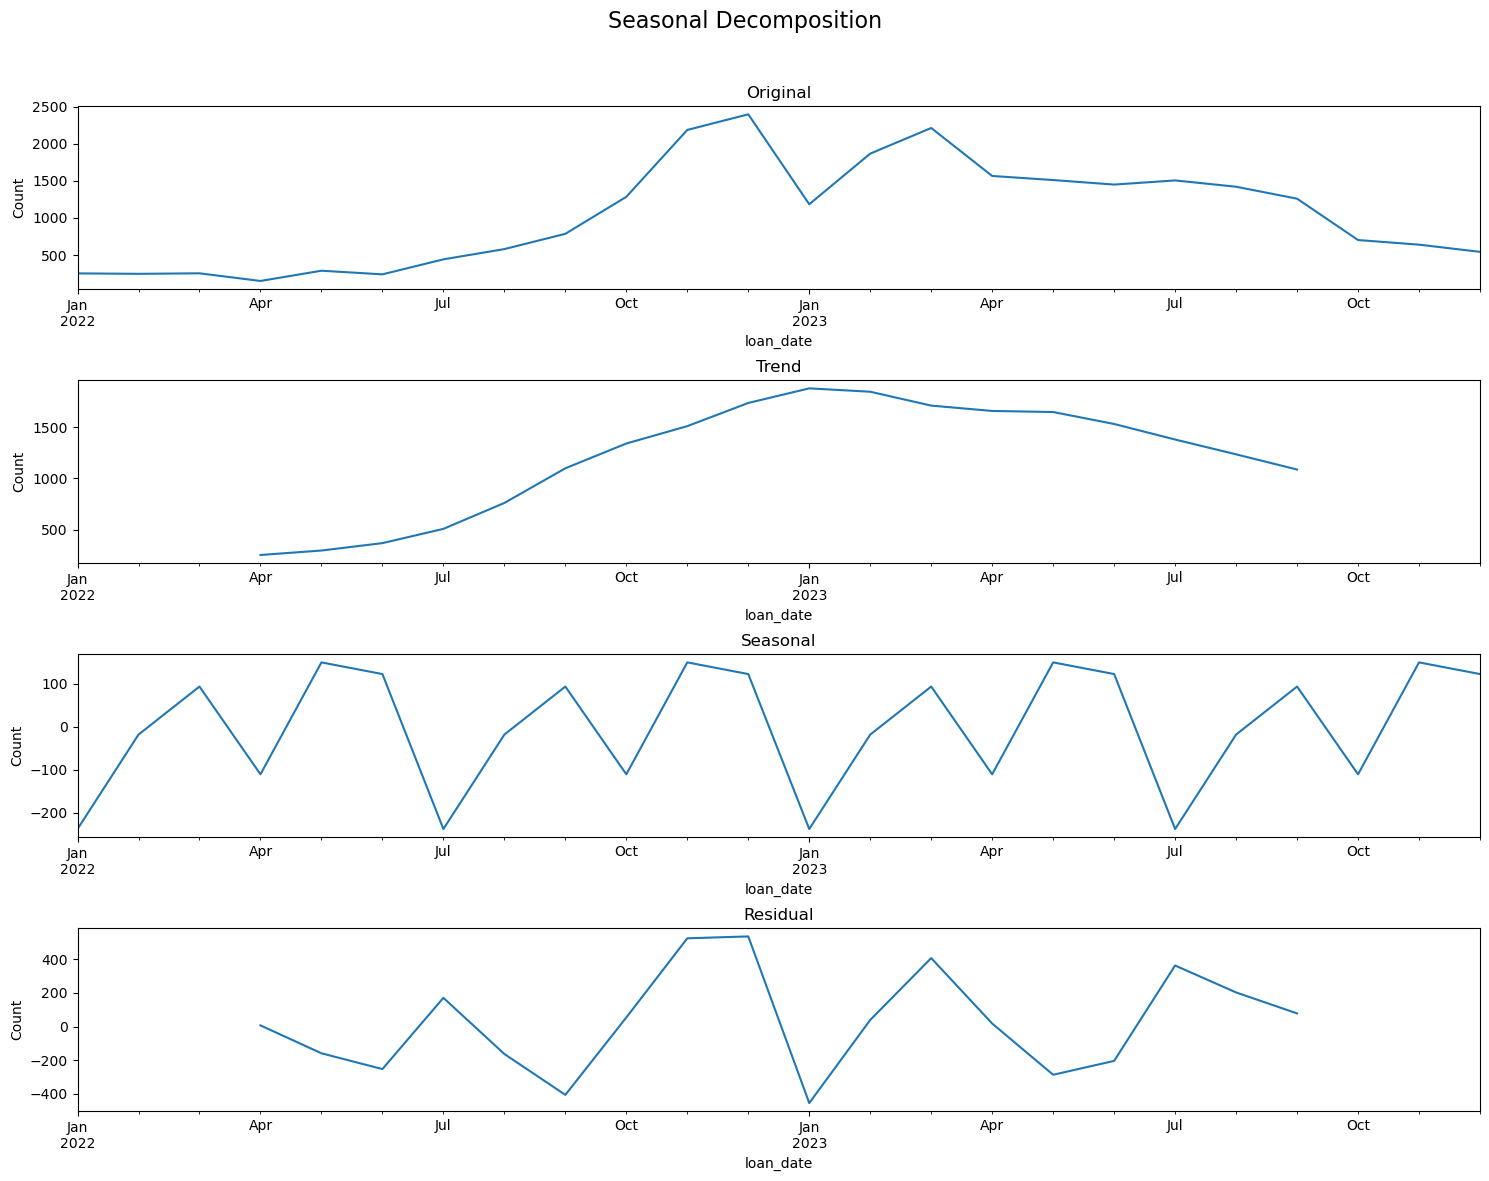

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure that 'df' has a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    print("The DataFrame index must be a DatetimeIndex.")
    # If 'date' is your column with datetime, then set it as index
    # df.set_index('date', inplace=True)

# Check if the data contains any NaNs, as the decomposition function may not handle them well
if df['BAD'].isna().any():
    print("Warning: NaN values found. They will be filled or dropped.")
    # You can choose either to fill NaNs or drop them:
    # df['BAD'].fillna(method='ffill', inplace=True)  # forward-fill
    df.dropna(subset=['BAD'], inplace=True)  # or drop rows with NaNs

# Resample data to a regular period, summing 'BAD' counts for each month
y = df['BAD'].resample('M').sum()

# Check if we have enough data points after resampling
if len(y) < 12:
    print(f"Warning: Not enough data points for seasonal decomposition after resampling ({len(y)} points). Seasonal decomposition requires multiple complete cycles.")

# Perform seasonal decomposition
try:
    # Assuming a known seasonality period of 6 months
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=6)

    # Plot the decomposed time series components
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    fig.suptitle('Seasonal Decomposition', fontsize=16)

    # Plot the original data
    y.plot(ax=ax1, title='Original')
    ax1.set_ylabel('Count')

    # Plot the trend component
    decomposition.trend.plot(ax=ax2, title='Trend')
    ax2.set_ylabel('Count')

    # Plot the seasonal component
    decomposition.seasonal.plot(ax=ax3, title='Seasonal')
    ax3.set_ylabel('Count')

    # Plot the residual component
    decomposition.resid.plot(ax=ax4, title='Residual')
    ax4.set_ylabel('Count')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

except ValueError as e:
    print(f"An error occurred during seasonal decomposition: {e}")


In [25]:
# This resets the index to the default integer index.
df = df.reset_index(drop=True)
df_1 = df
df.head()

,MONTH,region_tier,vnpostUserName,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg14d,mean_distance_sellOrg7d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_28d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,BAD_lock,velocity_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,acceleration_3d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,BAD,day_of_week,day_of_month,month,quarter,year,days_since_last_activity
0,2022-11,TIER_1,00099806,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.035714,-0.016667,0,4,11,2,1,2022,0.0
1,2022-12,TIER_1,00099806,0,0,1,2,4,4,0,0,0,1,0,1,2,4,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,1,1,0,0,0,2,0,1,2,4,0,1,2,4,0,1,2,4,0,1,2,4,0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.142857,-0.142857,-0.142857,-0.066667,0,6,12,6,2,2022,121.0
2,2022-12,TIER_1,00099806,0,1,1,3,5,5,1,1,1,2,1,1,3,5,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2,3,0,0,1,1,1,1,1,3,1,1,3,5,1,1,3,5,1,1,3,5,1,1,3,5,0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.142857,-0.214286,-0.178571,-0.083333,0,0,12,9,3,2022,92.0
3,2022-12,TIER_1,00099806,0,2,3,4,7,7,0,1,1,2,2,3,4,7,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3,5,1,1,1,2,0,1,1,3,2,3,4,7,0,1,2,5,2,3,4,7,2,3,4,7,0,0.0,0.0,0.0,0.0,0.0,-0.666667,-0.428571,-0.285714,-0.250000,-0.116667,0,5,12,11,4,2022,61.0
4,2022-11,TIER_1,00099806,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.035714,-0.016667,0,3,17,11,4,2022,5.0


In [26]:
# Get a list of all column names
all_columns = df_1.columns.tolist()

# Columns to exclude
exclude_columns = ["vnpostUserName", "BAD"]

# Get the final list of columns by excluding the specified columns
model_features = [col for col in all_columns if col not in exclude_columns]

# Clustering Algorithms

In [27]:
# from sklearn.metrics import silhouette_score

# # Preprocessing
# X_1 = df
# # Clone X from the list_sample
# X = df[list_sample].copy()

# # Select the numeric and categorical columns
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_features = X.select_dtypes(['object']).columns.tolist()

# # Define the preprocessing column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numeric_features),
#         ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), categorical_features)
#     ])

# # Fit and transform the preprocessing step on the data
# X_selected = preprocessor.fit_transform(df[list_sample])

# # Initialize a dictionary to store the Silhouette scores
# silhouette_scores = {}

# best_n_components = None
# best_cluster_labels = None
# max_score = -1  # initial value for silhouette score

# # Loop over different numbers of PCA components
# for n_components in range(2, 7):
#     # Perform TruncatedSVD on the preprocessed data, limiting to n_components
#     svd = TruncatedSVD(n_components=n_components)
#     X_svd = svd.fit_transform(X_selected)

#     # Fit the KMeans model on the SVD-transformed data
#     kmeans = KMeans(n_clusters=3, random_state=19)
#     cluster_labels = kmeans.fit_predict(X_svd)

#     # Calculate the Silhouette score
#     score = silhouette_score(X_svd, cluster_labels)
#     silhouette_scores[n_components] = score

#     if score > max_score:
#         max_score = score
#         best_n_components = n_components
#         best_cluster_labels = cluster_labels

# # Add the cluster labels and PCA components to the original dataframe
# df['cluster_label'] = best_cluster_labels
# for i in range(best_n_components):
#     df[f'PC{i+1}'] = X_svd[:, i]

In [28]:
# # Initialize a dictionary to store the Silhouette scores
# silhouette_scores = {}

# # Input the range of numbers for clusters
# min_clusters = 2
# max_clusters = 7

# # Loop over different numbers of clusters
# for n_clusters in range(min_clusters, max_clusters + 1):
#     # Fit the KMeans model on the preprocessed data
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     X_clusters = kmeans.fit_predict(preprocessor.fit_transform(X))

#     # Calculate the Silhouette score
#     score = silhouette_score(preprocessor.fit_transform(X), X_clusters)

#     # Store the Silhouette score in the dictionary
#     silhouette_scores[n_clusters] = score

# # Get the number of clusters with the highest Silhouette score
# best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)

# # Print the number of clusters with the highest Silhouette score
# print(f"The optimal number of clusters is {best_n_clusters} with a Silhouette score of {silhouette_scores[best_n_clusters]:.3f}")

In [29]:
# # Fit the KMeans model on the PCA-transformed data with the optimal number of clusters
# kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(X_svd)

# # Define the clustering pipeline
# pipeline = Pipeline(steps=[
#     ('kmeans', kmeans)
# ])

# # Calculate the Silhouette score for the optimal configuration
# score = silhouette_score(X_svd, cluster_labels)

# # Print the Silhouette score
# print(f"The optimal Silhouette score is {score:.3f} with {best_n_clusters} clusters and {best_n_components} PCA components.")

In [30]:
# # Add the cluster labels to the subset dataframe
# X_clusters = X.copy()
# X_clusters['cluster_label'] = cluster_labels

In [31]:
# # Create a 3D subplot with enhanced style
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d', frame_on=True)

# # Scatter plot with enhanced style
# scatter = ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=cluster_labels, cmap='plasma', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
# centroids = ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='o', s=200, edgecolors='k', label='Centroids')

# # Set labels, title, and grid
# ax.set_xlabel('PC1', labelpad=10)
# ax.set_ylabel('PC2', labelpad=10)
# ax.set_zlabel('PC3', labelpad=10)
# ax.set_title(f'3D Clustering Result', pad=20)
# ax.grid(True, linestyle='--', alpha=0.5)
# ax.w_xaxis.pane.fill = ax.w_yaxis.pane.fill = ax.w_zaxis.pane.fill = False  # Remove the default pane background

# # Optionally set the view angle for better visualization
# ax.view_init(elev=25, azim=70)

# # Add a colorbar and legend
# cbar = fig.colorbar(scatter, ax=ax, pad=0.1, aspect=30)
# cbar.set_label('Cluster Label')
# ax.legend(handles=[centroids], loc='upper right')

# plt.tight_layout()
# plt.show()


# Weight of Evidence

In [32]:
# Split Train - Test
loan_data_train, loan_data_test = train_test_split(loan_data, test_size=0.2, random_state=42, stratify=loan_data['BAD'])

## Function definitions

In [33]:
# def woe_discrete(df_input, variable_name):
#     df = df_input[[variable_name, 'BAD']]
#     df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
#                     df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
#     df = df.iloc[:, [0, 1, 3]]
#     df.columns = [variable_name, 'n_obs', 'prop_bad']
#     df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
#     df['n_bad'] = df['prop_bad'] * df['n_obs']
#     df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
#     df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
#     df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
#     df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE']).reset_index(drop = True)
#     df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#     df['IV'] = df['IV'].sum()
#     if (df['IV'][0] == -np.inf) or (df['IV'][0] == np.inf):
#         extreme = set(df[(df['WoE'] > -np.inf) & (df['WoE'] < np.inf)][variable_name])
#         df_input_new = df_input[df_input[variable_name].isin(extreme)]
#         df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
#     else:
#         df['IV_adjusted'] = df['IV']
        
#     return df

# def plot_by_woe(df_WoE, rotation_of_x_axis_labels=30, figsize=(10, 5)):
#     x = np.array(df_WoE.iloc[:, 0].apply(str))
#     y = df_WoE['WoE']
#     colors = ['red' if val < 0 else 'green' for val in y]  # Assign red color for negative values and green for positive values
#     plt.figure(figsize=figsize)
#     plt.plot(x, y, marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6)  # Set line color to blue, marker edge color to black, and marker size to 6
#     plt.axhline(0, color='k', linestyle='--')  # Add a horizontal line at y=0 for reference
#     var_name = df_WoE.columns[0]
#     var_IV = df_WoE['IV_adjusted'][0]
#     plt.ylabel('Weight of Evidence')
#     plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
#     plt.xticks(rotation=rotation_of_x_axis_labels, ha='right')
#     plt.subplots_adjust(bottom=0.15)
    
#     # Customize legend colors
#     handles = [plt.Line2D([], [], marker='o', linestyle='--', color='k', markersize=6),
#                plt.Line2D([], [], marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6, markerfacecolor='none')]
#     labels = ['y = 0', 'Weight of Evidence']
#     plt.legend(handles, labels, loc='best')
    
#     # Set custom colors for markers
#     for i, (xi, yi) in enumerate(zip(x, y)):
#         plt.plot(xi, yi, marker='o', color=colors[i], mec='black', mew=1, ms=6)
    
#     plt.show()

In [34]:
def woe_discrete(df_input, variable_name):
    df = df_input[[variable_name, 'BAD']]
    df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
    df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE']).reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    if (df['IV'][0] == -inf) or (df['IV'][0] == inf):
        extreme = set(df[(df['WoE'] > -inf) & (df['WoE'] < inf)][variable_name])
        df_input_new = df_input[df_input[variable_name].isin(extreme)]
        df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
    else:
        df['IV_adjusted'] = df['IV']
    return df


def woe_continuous(df_input, variable_name, class_count = 50):
    df = df_input
    fine_classing_variable = variable_name + '_fine_classing'
    df[fine_classing_variable] = pd.cut(df[variable_name], class_count)
    df = woe_discrete(df, fine_classing_variable)
    df = df.sort_values([fine_classing_variable])
    df = df.reset_index(drop = True)
    return df


def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [3, 20]):
    candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))
    IV_adjusted_list = [woe_continuous(df_input, variable_name, class_count)['IV_adjusted'][0] for class_count in candidate_class_counts]
    best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]
    return [best_cut, woe_continuous(df_input, variable_name, best_cut)]



def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0, figsize=(10, 5)):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    var_name = df_WoE.columns[0]
    var_IV = df_WoE['IV_adjusted'][0]
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
    plt.xticks(rotation=30, ha='right')
    plt.subplots_adjust(bottom=0.15)
    plt.show()

In [35]:
# Object columns 
columns_obj = loan_data.select_dtypes(['object']).columns
columns_obj

Index(['MONTH', 'region_tier', 'vnpostUserName'], dtype='object')

In [36]:
import math
discrete_cols = ['region_tier']
df_discrete = pd.DataFrame(discrete_cols).rename(columns = {0:'DISCRETE_COL'})
df_discrete['DISTINCT'], df_discrete['IV'], df_discrete['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_discrete)):
    col = df_discrete['DISCRETE_COL'][i]
    results = woe_discrete(loan_data, col)
    df_discrete['DISTINCT'][i] = len(results)
    df_discrete['IV'][i] = results['IV'][0]
    df_discrete['IV_ADJUSTED'][i] = results['IV_adjusted'][0]
    print(col, 'done!')
df_discrete = df_discrete.sort_values(['IV_ADJUSTED', 'IV', 'DISTINCT'], ascending = [False, True, True]).reset_index(drop = True)
df_discrete

region_tier done!


,DISCRETE_COL,DISTINCT,IV,IV_ADJUSTED
0,region_tier,4,inf,0.093536


In [37]:
# Filter columns based on DISTINCT and IV_ADJUSTED
selected_discrete_cols = []
for i in range(len(df_discrete)):
    if df_discrete['IV_ADJUSTED'][i] > 0 and df_discrete['DISTINCT'][i] < 20:
        selected_discrete_cols.append(df_discrete['DISCRETE_COL'][i])
        
    
print('Selected discrete columns:', selected_discrete_cols)

Selected discrete columns: ['region_tier']


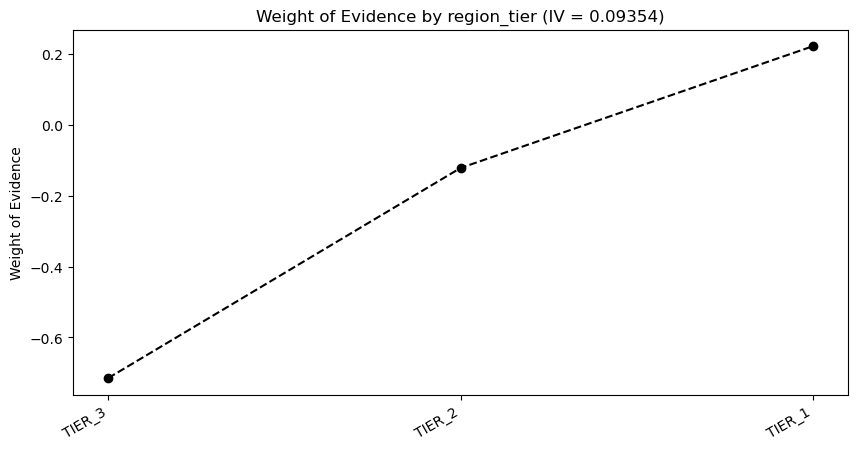

In [38]:
# Sample plot of "total_app_label"
plot_by_woe(woe_discrete(loan_data, 'region_tier'))

## Discretize the continuous

In [39]:
# Continuous columns
columns_num = loan_data.select_dtypes(['float', 'int']).columns
columns_num

Index(['app_cnt_1d', 'app_cnt_3d', 'app_cnt_7d', 'app_cnt_14d', 'app_cnt_28d',
       'app_cnt_60d', 'approve_cnt_3d', 'approve_cnt_7d', 'approve_cnt_14d',
       'approve_cnt_28d',
       ...
       'acceleration_7d', 'acceleration_14d', 'acceleration_28d',
       'acceleration_60d', 'BAD', 'day_of_week', 'day_of_month', 'month',
       'quarter', 'year'],
      dtype='object', length=101)

In [40]:
# Manipulation with continuous variables
pd.options.display.max_rows = None
continuous_cols = [col for col in columns_num if col not in ['month','BAD', 'month_demand','cumulative_fpd_rate','cumulative_fpd','cumulative_app','BAD_lock']]

df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_continuous)):
    col = df_continuous['CONTINUOUS_COL'][i]
    results = woe_continuous_best_class_count(loan_data, col)
    df_continuous['BEST_CUT'][i] = results[0]
    df_continuous['IV'][i] = results[1]['IV'][0]
    df_continuous['IV_ADJUSTED'][i] = results[1]['IV_adjusted'][0]
    print(col, 'done!')
df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
df_continuous

app_cnt_1d done!
app_cnt_3d done!
app_cnt_7d done!
app_cnt_14d done!
app_cnt_28d done!
app_cnt_60d done!
approve_cnt_3d done!
approve_cnt_7d done!
approve_cnt_14d done!
approve_cnt_28d done!
stable_and_self_employed_rate_cnt_3d done!
stable_and_self_employed_rate_cnt_7d done!
stable_and_self_employed_rate_cnt_14d done!
stable_and_self_employed_rate_cnt_28d done!
outSideApp_cnt_7d done!
outSideApp_cnt_14d done!
outSideApp_cnt_28d done!
outSideAppPermanent_cnt_7d done!
outSideAppPermanent_cnt_14d done!
outSideAppPermanent_cnt_28d done!
term_permanent_flag_cnt_7d done!
term_permanent_flag_cnt_14d done!
term_permanent_flag_cnt_28d done!
idTrigger_cnt_7d done!
idTrigger_cnt_14d done!
idTrigger_cnt_28d done!
phoneTrigger_cnt_7d done!
phoneTrigger_cnt_14d done!
phoneTrigger_cnt_28d done!
userTriggerNew_cnt_7d done!
userTriggerNew_cnt_14d done!
userTriggerNew_cnt_28d done!
createTimeTrigger_cnt_7d done!
createTimeTrigger_cnt_14d done!
createTimeTrigger_cnt_28d done!
emailTrigger_cnt_7d done!
e

,CONTINUOUS_COL,BEST_CUT,IV,IV_ADJUSTED
0,male_cnt_7d,17,inf,0.282149
1,male_cnt_14d,19,inf,0.277652
2,male_cnt_28d,19,inf,0.265532
3,idcard_rej_cnt_7d,18,inf,0.25038
4,Single_cnt_28d,19,inf,0.249653
5,idcard_cnt_7d,19,inf,0.24474
6,refphone_cnt_7d,19,inf,0.244491
7,idcard_rej_cnt_14d,18,inf,0.24338
8,app_cnt_7d,19,inf,0.240696
9,refphone_cnt_14d,19,inf,0.240018


In [41]:
# def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [5, 6]):
#     candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))

#     # Generate bins for each candidate class count
#     candidate_bins = [pd.qcut(df_input[variable_name], q=count, duplicates='drop', retbins=True) 
#                       for count in candidate_class_counts]

#     # Calculate WoE and IV for each binning scheme
#     IV_adjusted_list = [woe_discrete(pd.DataFrame({variable_name: bins[0], 'BAD': df_input['BAD']}), variable_name)['IV_adjusted'][0] 
#                         for bins in candidate_bins]

#     # Find best class count
#     best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]

#     return [best_cut, woe_discrete(pd.DataFrame({variable_name: candidate_bins[best_cut-class_count_bounds[0]][0], 'BAD': df_input['BAD']}), variable_name), candidate_bins[best_cut-class_count_bounds[0]][1]]

In [42]:
# # Manipulation with continuous variables
# pd.options.display.max_rows = None
# continuous_cols = [col for col in columns_num if col not in ['BAD', 'quarter', 'year']]

# df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
# df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'], df_continuous['BINS'] = '', '', '', ''
# for i in range(len(df_continuous)):
#     col = df_continuous['CONTINUOUS_COL'][i]
#     if loan_data[col].max() < 1:
#         loan_data[col] = loan_data[col] * 100
#     results = woe_continuous_best_class_count(loan_data, col)
#     df_continuous.at[i, 'BEST_CUT'] = results[0]
#     df_continuous.at[i, 'IV'] = results[1]['IV'][0]
#     df_continuous.at[i, 'IV_ADJUSTED'] = results[1]['IV_adjusted'][0]
#     df_continuous.at[i, 'BINS'] = results[2]
#     print(col, 'done!')

# df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
# # Display the top 100 rows with the highest IV scores
# df_continuous

In [43]:
# df_continuous_IV_gt_02 = df_continuous[(df_continuous['IV_ADJUSTED'] > 0.2) & (df_continuous['IV_ADJUSTED'] < 0.5)]
# df_continuous_IV_gt_02
# # for i in range(len(df_continuous_IV_gt_02)):
# #     col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
# #     bins = df_continuous_IV_gt_02.iloc[i]['BINS']
# #     loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
# #     print(col, 'binned!')

# # for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
# #     results = woe_continuous_best_class_count(loan_data, col)
# #     woe_results = results[1]
# #     plot_by_woe(woe_results)

In [44]:
# Select columns from WOE results
selected_continuous_cols = ['male_cnt_28d', 'outSideAppPermanent_cnt_28d', 'idcard_rej_cnt_14d', 'Single_cnt_28d', 
                            'refphone_cnt_28d','app_cnt_14d','term_permanent_flag_cnt_28d','userTriggerNew_cnt_28d',
                            'nonViettel_cnt_28d','acceleration_14d','acceleration_28d','acceleration_60d','acceleration_7d']
selected_continuous_cols = [x + '_discrete' for x in selected_continuous_cols]

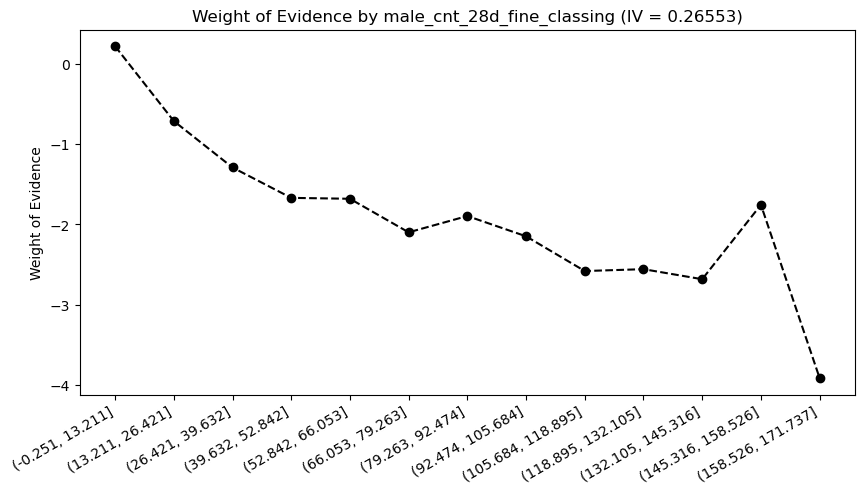

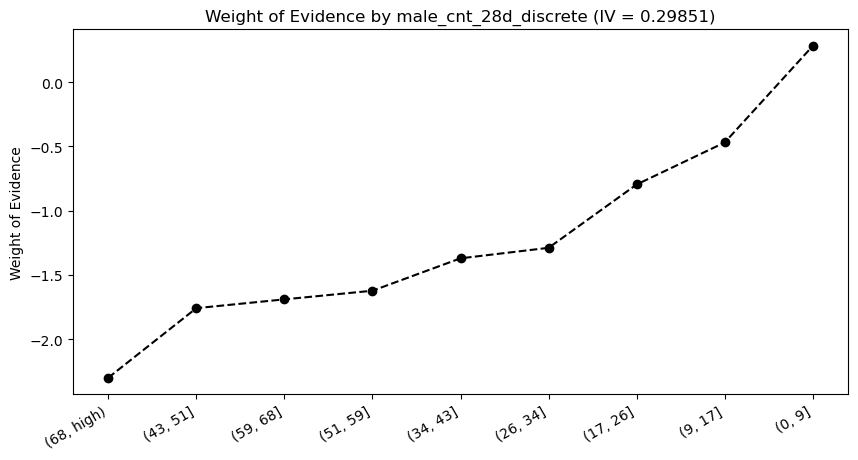

In [45]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'male_cnt_28d')[1], 90)
def male_cnt_28d_discrete(male_cnt_28d):
    if male_cnt_28d <= 9:
        return '(0, 9]'
    if male_cnt_28d <= 17:
        return '(9, 17]'
    if male_cnt_28d <= 26:
        return '(17, 26]'
    if male_cnt_28d <= 34:
        return '(26, 34]'
    if male_cnt_28d <= 43:
        return '(34, 43]'
    if male_cnt_28d <= 51:
        return '(43, 51]'
    if male_cnt_28d <= 59:
        return '(51, 59]'
    if male_cnt_28d <= 68:
        return '(59, 68]'
    return '(68, high)'


loan_data_train['male_cnt_28d_discrete'] = loan_data_train['male_cnt_28d'].apply(lambda x: male_cnt_28d_discrete(x))
loan_data_test['male_cnt_28d_discrete'] = loan_data_test['male_cnt_28d'].apply(lambda x: male_cnt_28d_discrete(x))
loan_data['male_cnt_28d_discrete'] = loan_data['male_cnt_28d'].apply(lambda x: male_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'male_cnt_28d_discrete'),90)

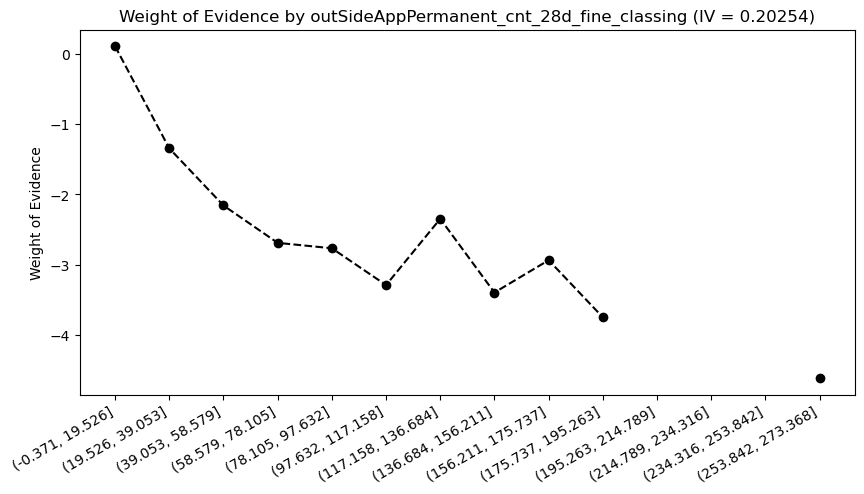

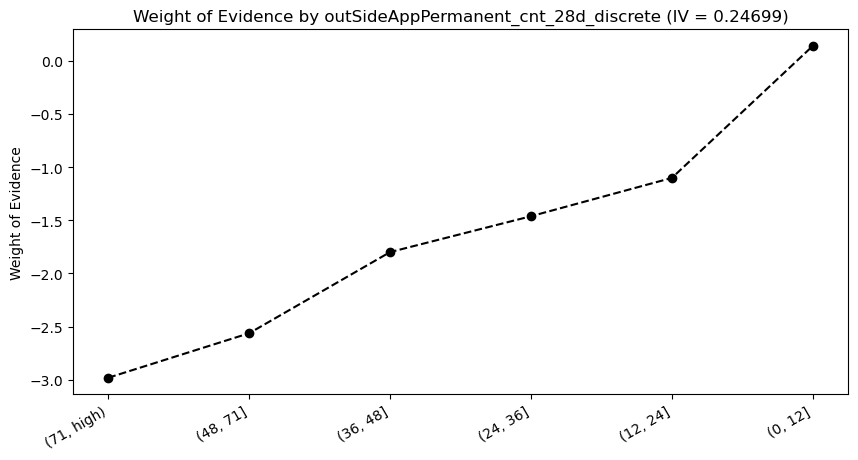

In [46]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'outSideAppPermanent_cnt_28d')[1], 90)
def outSideAppPermanent_cnt_28d_discrete(outSideAppPermanent_cnt_28d):
    if outSideAppPermanent_cnt_28d <= 12:
        return '(0, 12]'
    if outSideAppPermanent_cnt_28d <= 24:
        return '(12, 24]'
    if outSideAppPermanent_cnt_28d <= 36:
        return '(24, 36]'     
    if outSideAppPermanent_cnt_28d <= 48:
        return '(36, 48]'
    if outSideAppPermanent_cnt_28d <= 71:
        return '(48, 71]'
    return '(71, high)'


loan_data_train['outSideAppPermanent_cnt_28d_discrete'] = loan_data_train['outSideAppPermanent_cnt_28d'].apply(lambda x: outSideAppPermanent_cnt_28d_discrete(x))
loan_data_test['outSideAppPermanent_cnt_28d_discrete'] = loan_data_test['outSideAppPermanent_cnt_28d'].apply(lambda x: outSideAppPermanent_cnt_28d_discrete(x))
loan_data['outSideAppPermanent_cnt_28d_discrete'] = loan_data['outSideAppPermanent_cnt_28d'].apply(lambda x: outSideAppPermanent_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'outSideAppPermanent_cnt_28d_discrete'),90)

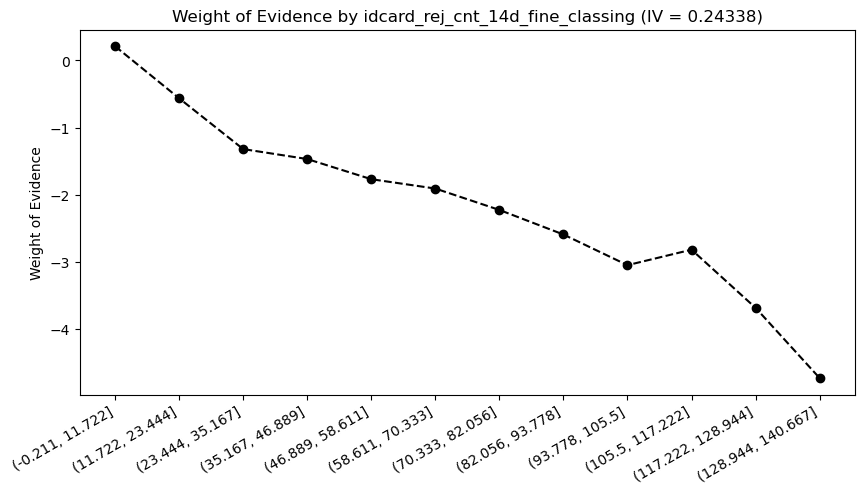

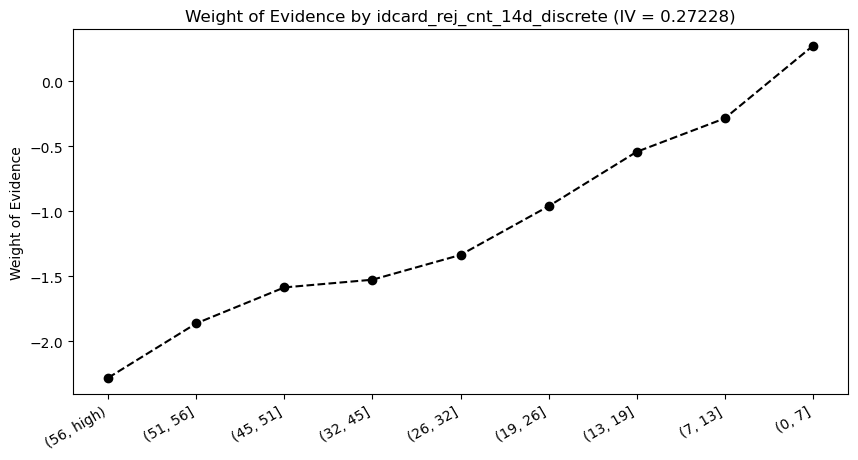

In [47]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'idcard_rej_cnt_14d')[1], 90)
def idcard_rej_cnt_14d_discrete(idcard_rej_cnt_14d):
    if idcard_rej_cnt_14d <= 7:
        return '(0, 7]'
    if idcard_rej_cnt_14d <= 13:
        return '(7, 13]'
    if idcard_rej_cnt_14d <= 19:
        return '(13, 19]'
    if idcard_rej_cnt_14d <= 26:
        return '(19, 26]'
    if idcard_rej_cnt_14d <= 32:
        return '(26, 32]'
    # if idcard_rej_cnt_14d <= 38:
    #     return '(32, 38]'
    if idcard_rej_cnt_14d <= 45:
        return '(32, 45]'
    if idcard_rej_cnt_14d <= 51:
        return '(45, 51]'
    if idcard_rej_cnt_14d <= 56:
        return '(51, 56]'
    return '(56, high)'


loan_data_train['idcard_rej_cnt_14d_discrete'] = loan_data_train['idcard_rej_cnt_14d'].apply(lambda x: idcard_rej_cnt_14d_discrete(x))
loan_data_test['idcard_rej_cnt_14d_discrete'] = loan_data_test['idcard_rej_cnt_14d'].apply(lambda x: idcard_rej_cnt_14d_discrete(x))
loan_data['idcard_rej_cnt_14d_discrete'] = loan_data['idcard_rej_cnt_14d'].apply(lambda x: idcard_rej_cnt_14d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'idcard_rej_cnt_14d_discrete'),90)

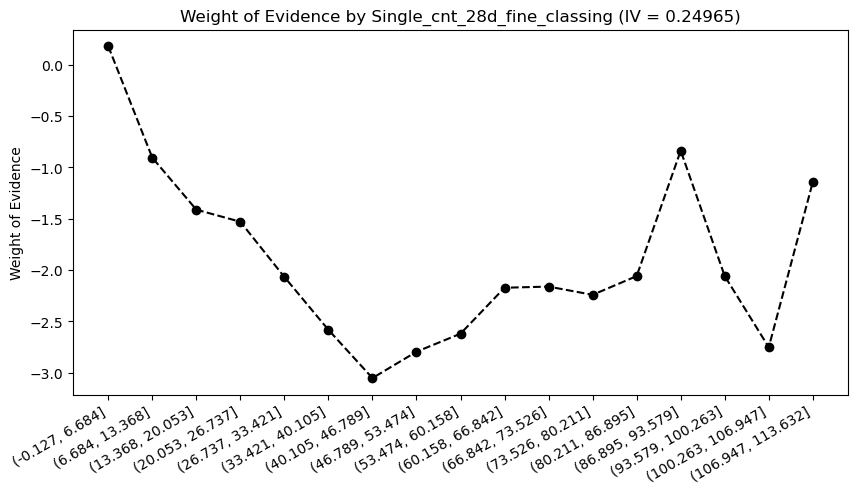

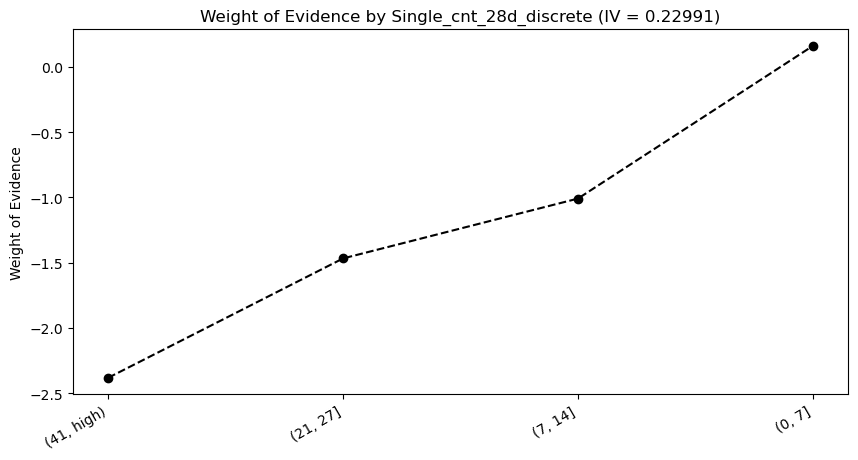

In [48]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'Single_cnt_28d')[1], 90)
def Single_cnt_28d_discrete(Single_cnt_28d):
    if Single_cnt_28d <= 7:
        return '(0, 7]'
    if Single_cnt_28d <= 14:
        return '(7, 14]'
    if Single_cnt_28d <= 27:
        return '(21, 27]'

    return '(41, high)'


loan_data_train['Single_cnt_28d_discrete'] = loan_data_train['Single_cnt_28d'].apply(lambda x: Single_cnt_28d_discrete(x))
loan_data_test['Single_cnt_28d_discrete'] = loan_data_test['Single_cnt_28d'].apply(lambda x: Single_cnt_28d_discrete(x))
loan_data['Single_cnt_28d_discrete'] = loan_data['Single_cnt_28d'].apply(lambda x: Single_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'Single_cnt_28d_discrete'),90)

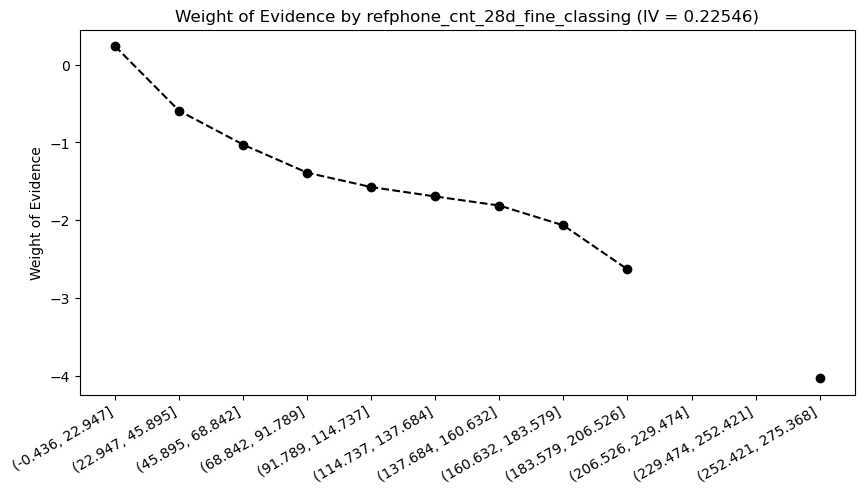

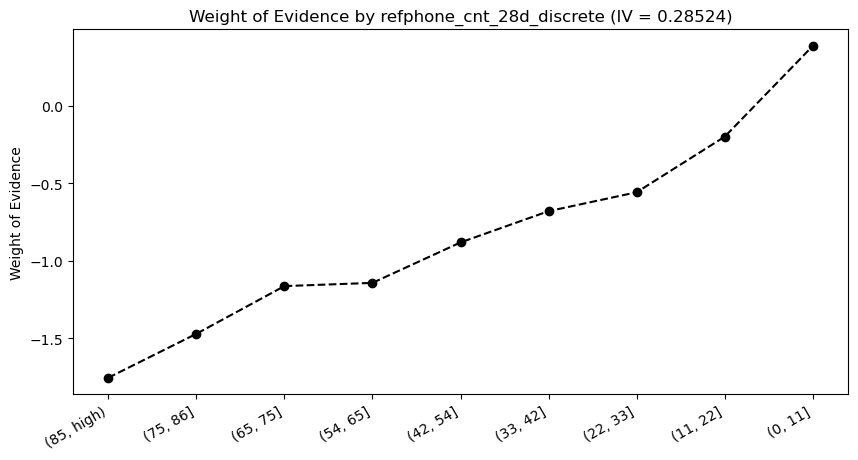

In [49]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'refphone_cnt_28d')[1], 90)
def refphone_cnt_28d_discrete(refphone_cnt_28d):
    if refphone_cnt_28d <= 11:
        return '(0, 11]'
    if refphone_cnt_28d <= 22:
        return '(11, 22]'
    if refphone_cnt_28d <= 33:
        return '(22, 33]'
    if refphone_cnt_28d <= 42:
        return '(33, 42]'
    if refphone_cnt_28d <= 54:
        return '(42, 54]'
    if refphone_cnt_28d <= 65:
        return '(54, 65]'
    if refphone_cnt_28d <= 75:
        return '(65, 75]'
    if refphone_cnt_28d <= 86:
        return '(75, 86]'
    return '(85, high)'


loan_data_train['refphone_cnt_28d_discrete'] = loan_data_train['refphone_cnt_28d'].apply(lambda x: refphone_cnt_28d_discrete(x))
loan_data_test['refphone_cnt_28d_discrete'] = loan_data_test['refphone_cnt_28d'].apply(lambda x: refphone_cnt_28d_discrete(x))
loan_data['refphone_cnt_28d_discrete'] = loan_data['refphone_cnt_28d'].apply(lambda x: refphone_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'refphone_cnt_28d_discrete'),90)

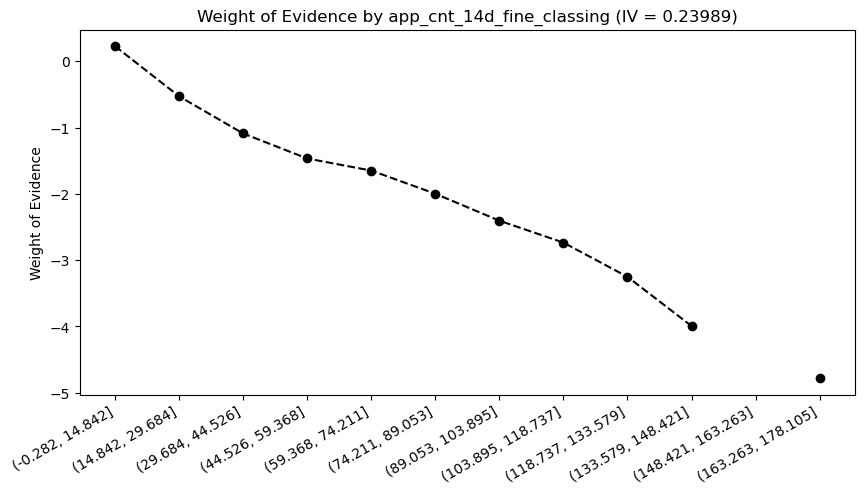

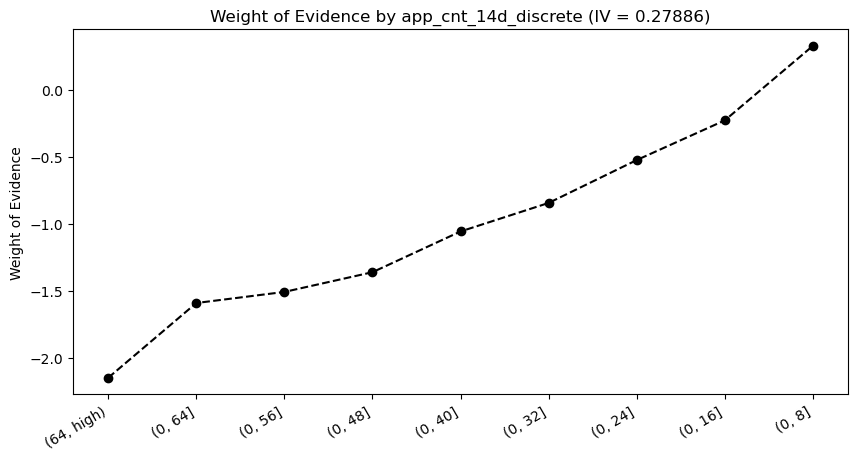

In [50]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'app_cnt_14d')[1], 90)
def app_cnt_14d_discrete(app_cnt_14d):
    if app_cnt_14d <= 8:
        return '(0, 8]'
    if app_cnt_14d <= 16:
        return '(0, 16]'
    if app_cnt_14d <= 24:
        return '(0, 24]'
    if app_cnt_14d <= 32:
        return '(0, 32]'
    if app_cnt_14d <= 40:
        return '(0, 40]'
    if app_cnt_14d <= 48:
        return '(0, 48]'
    if app_cnt_14d <= 56:
        return '(0, 56]'
    if app_cnt_14d <= 64:
        return '(0, 64]'
    return '(64, high)'



loan_data_train['app_cnt_14d_discrete'] = loan_data_train['app_cnt_14d'].apply(lambda x: app_cnt_14d_discrete(x))
loan_data_test['app_cnt_14d_discrete'] = loan_data_test['app_cnt_14d'].apply(lambda x: app_cnt_14d_discrete(x))
loan_data['app_cnt_14d_discrete'] = loan_data['app_cnt_14d'].apply(lambda x: app_cnt_14d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'app_cnt_14d_discrete'),90)

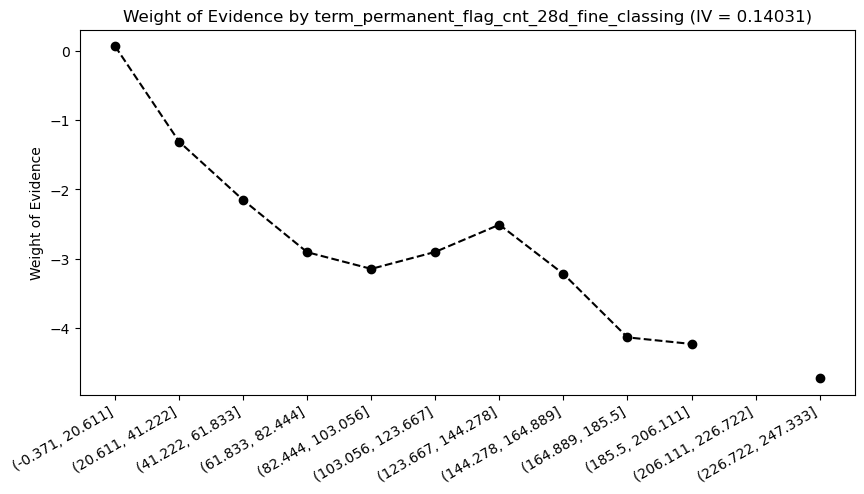

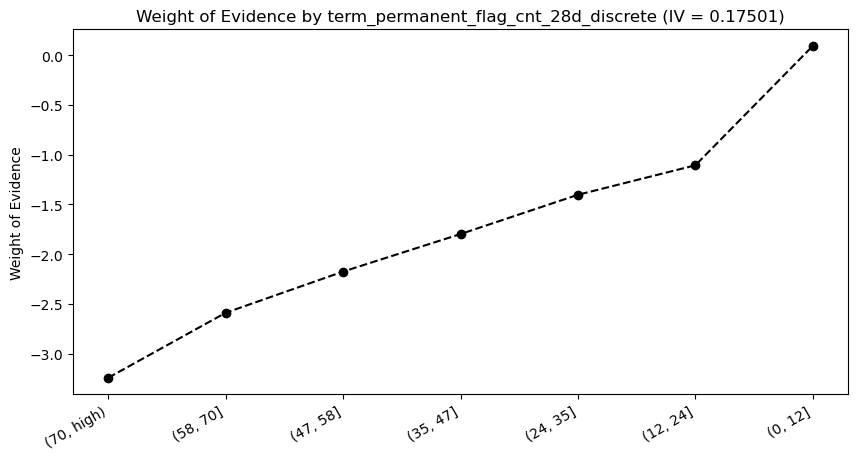

In [51]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'term_permanent_flag_cnt_28d')[1], 90)
def term_permanent_flag_cnt_28d_discrete(term_permanent_flag_cnt_28d):
    if term_permanent_flag_cnt_28d <= 12:
        return '(0, 12]'
    if term_permanent_flag_cnt_28d <= 24:
        return '(12, 24]'
    if term_permanent_flag_cnt_28d <= 35:
        return '(24, 35]'
    if term_permanent_flag_cnt_28d <= 47:
        return '(35, 47]'
    if term_permanent_flag_cnt_28d <= 58:
        return '(47, 58]'
    if term_permanent_flag_cnt_28d <= 70:
        return '(58, 70]'
    return '(70, high)'

loan_data_train['term_permanent_flag_cnt_28d_discrete'] = loan_data_train['term_permanent_flag_cnt_28d'].apply(lambda x: term_permanent_flag_cnt_28d_discrete(x))
loan_data_test['term_permanent_flag_cnt_28d_discrete'] = loan_data_test['term_permanent_flag_cnt_28d'].apply(lambda x: term_permanent_flag_cnt_28d_discrete(x))
loan_data['term_permanent_flag_cnt_28d_discrete'] = loan_data['term_permanent_flag_cnt_28d'].apply(lambda x: term_permanent_flag_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'term_permanent_flag_cnt_28d_discrete'),90)

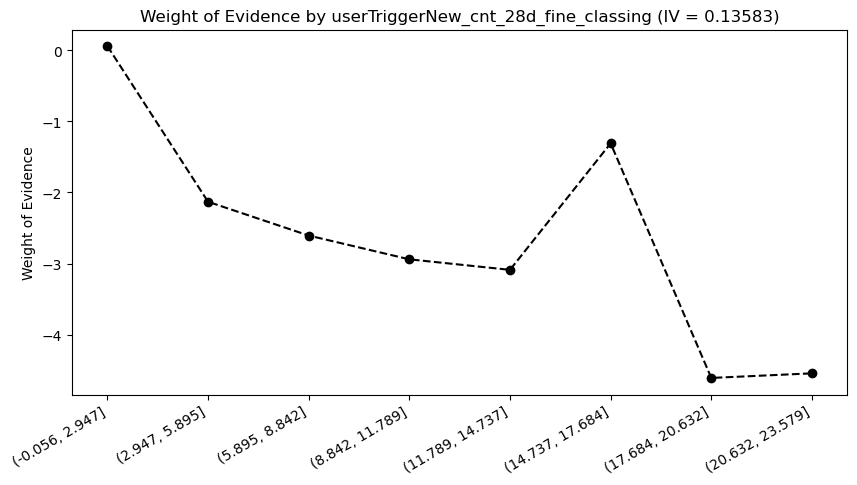

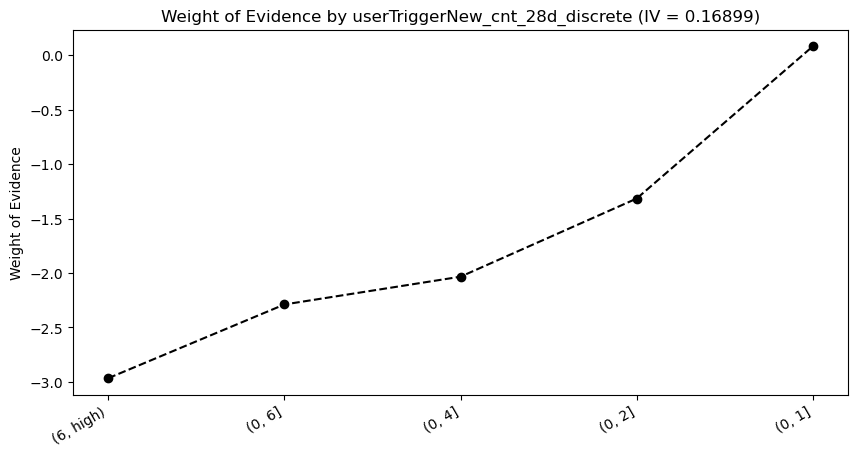

In [52]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'userTriggerNew_cnt_28d')[1], 90)
def userTriggerNew_cnt_28d_discrete(userTriggerNew_cnt_28d):
    if userTriggerNew_cnt_28d <= 1:
        return '(0, 1]'
    if userTriggerNew_cnt_28d <= 2:
        return '(0, 2]'

    if userTriggerNew_cnt_28d <= 4:
        return '(0, 4]'

    if userTriggerNew_cnt_28d <= 6:
        return '(0, 6]'


    return '(6, high)'

loan_data_train['userTriggerNew_cnt_28d_discrete'] = loan_data_train['userTriggerNew_cnt_28d'].apply(lambda x: userTriggerNew_cnt_28d_discrete(x))
loan_data_test['userTriggerNew_cnt_28d_discrete'] = loan_data_test['userTriggerNew_cnt_28d'].apply(lambda x: userTriggerNew_cnt_28d_discrete(x))
loan_data['userTriggerNew_cnt_28d_discrete'] = loan_data['userTriggerNew_cnt_28d'].apply(lambda x: userTriggerNew_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'userTriggerNew_cnt_28d_discrete'),90)

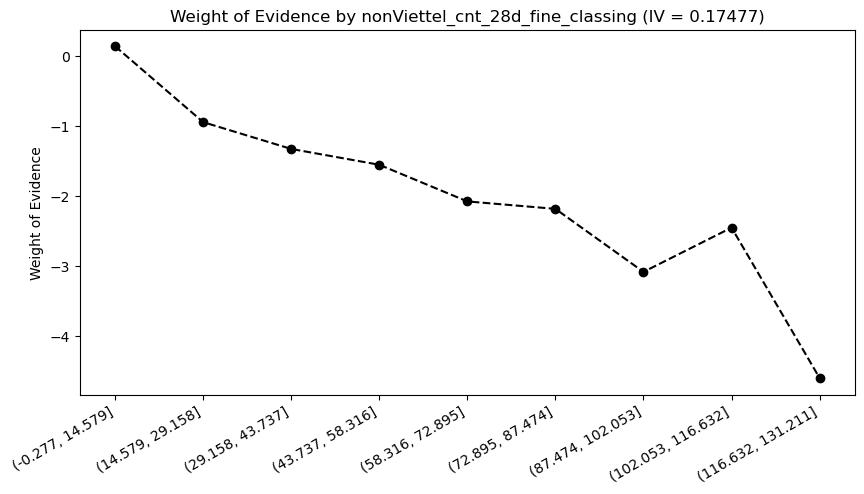

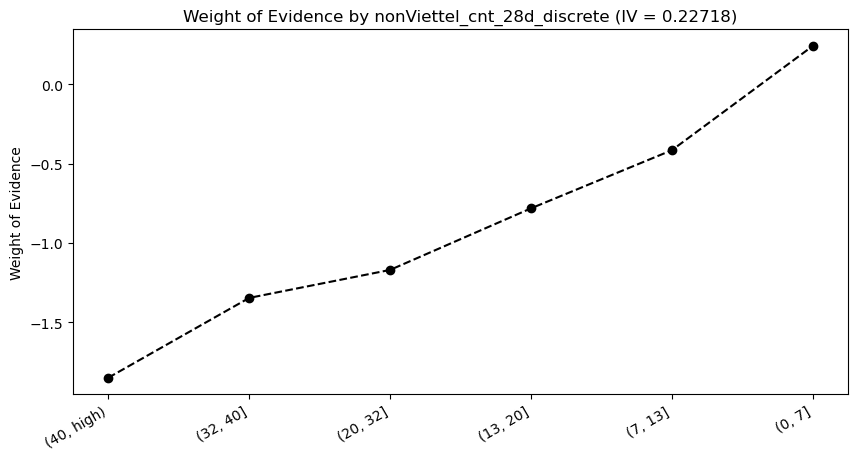

In [53]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'nonViettel_cnt_28d')[1], 90)
def nonViettel_cnt_28d_discrete(nonViettel_cnt_28d):
    if nonViettel_cnt_28d <= 7:
        return '(0, 7]'
    if nonViettel_cnt_28d <= 13:
        return '(7, 13]'
    if nonViettel_cnt_28d <= 20:
        return '(13, 20]'
    if nonViettel_cnt_28d <= 32:
        return '(20, 32]'
    if nonViettel_cnt_28d <= 40:
        return '(32, 40]'
    return '(40, high)'

loan_data_train['nonViettel_cnt_28d_discrete'] = loan_data_train['nonViettel_cnt_28d'].apply(lambda x: nonViettel_cnt_28d_discrete(x))
loan_data_test['nonViettel_cnt_28d_discrete'] = loan_data_test['nonViettel_cnt_28d'].apply(lambda x: nonViettel_cnt_28d_discrete(x))
loan_data['nonViettel_cnt_28d_discrete'] = loan_data['nonViettel_cnt_28d'].apply(lambda x: nonViettel_cnt_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'nonViettel_cnt_28d_discrete'),90)

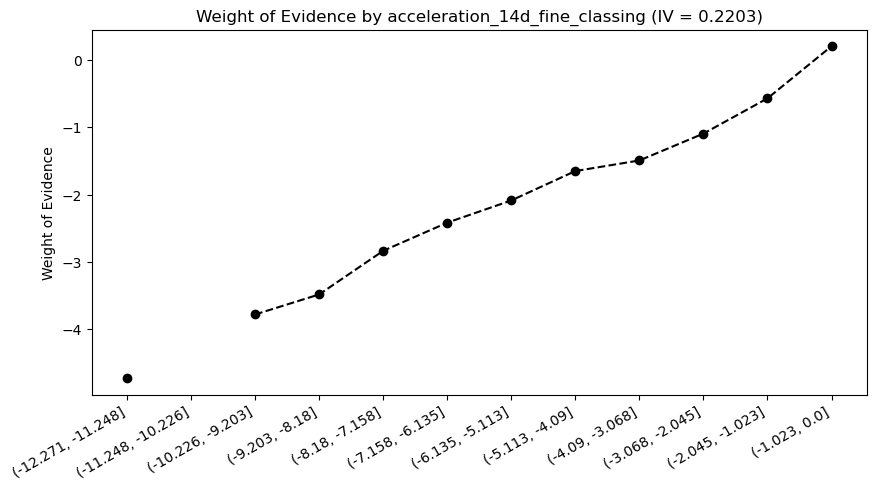

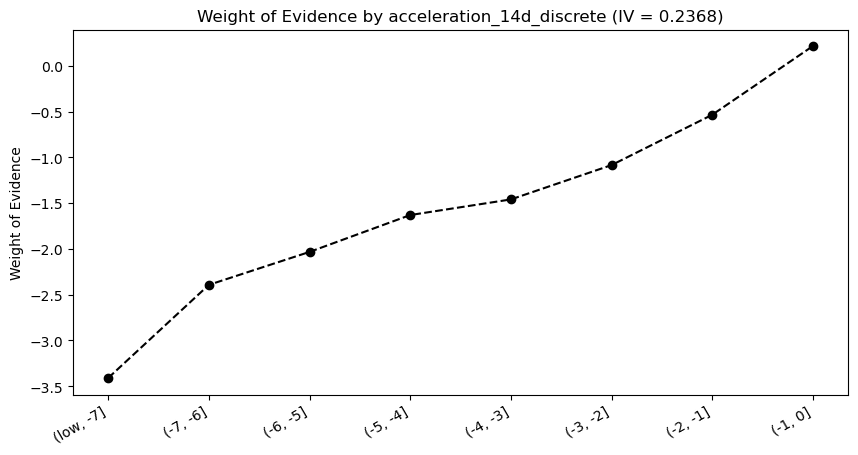

In [54]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'acceleration_14d')[1], 90)
def acceleration_14d_discrete(acceleration_14d):
    if acceleration_14d <= -7:
        return '(low, -7]'
    if acceleration_14d <= -6:
        return '(-7, -6]'
    if acceleration_14d <= -5:
        return '(-6, -5]'
    if acceleration_14d <= -4:
        return '(-5, -4]'
    if acceleration_14d <= -3:
        return '(-4, -3]'
    if acceleration_14d <= -2:
        return '(-3, -2]'
    if acceleration_14d <= -1:
        return '(-2, -1]'
    if acceleration_14d <= 0:
        return '(-1, 0]'
    return '(0, high)'

loan_data_train['acceleration_14d_discrete'] = loan_data_train['acceleration_14d'].apply(lambda x: acceleration_14d_discrete(x))
loan_data_test['acceleration_14d_discrete'] = loan_data_test['acceleration_14d'].apply(lambda x: acceleration_14d_discrete(x))
loan_data['acceleration_14d_discrete'] = loan_data['acceleration_14d'].apply(lambda x: acceleration_14d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'acceleration_14d_discrete'),90)

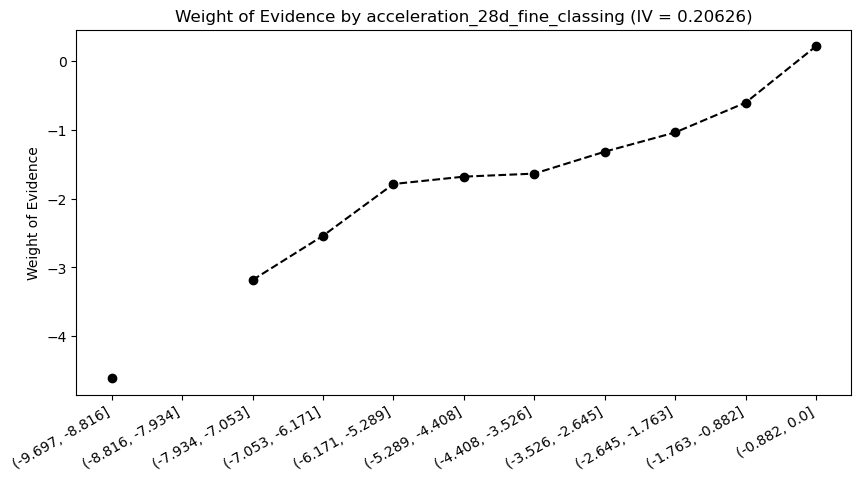

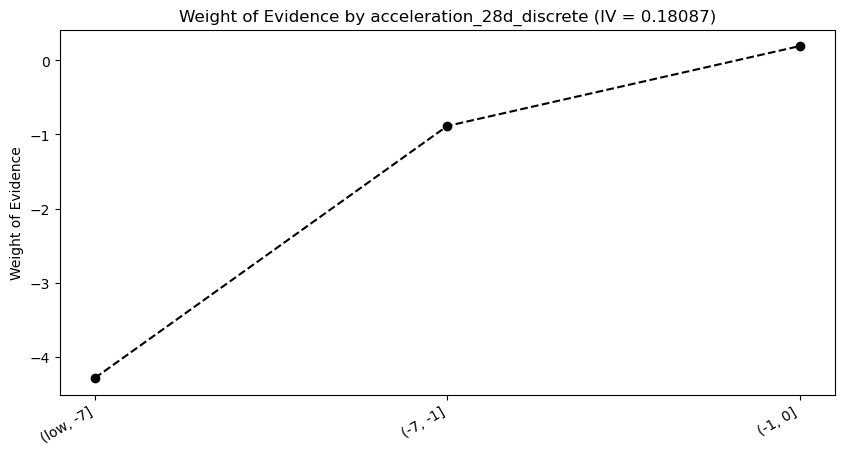

In [55]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'acceleration_28d')[1], 90)
def acceleration_28d_discrete(acceleration_28d):
    if acceleration_28d <= -7:
        return '(low, -7]'
    if acceleration_28d <= -1:
        return '(-7, -1]'
    if acceleration_28d <= 0:
        return '(-1, 0]'
    return '(0, high)'

loan_data_train['acceleration_28d_discrete'] = loan_data_train['acceleration_28d'].apply(lambda x: acceleration_28d_discrete(x))
loan_data_test['acceleration_28d_discrete'] = loan_data_test['acceleration_28d'].apply(lambda x: acceleration_28d_discrete(x))
loan_data['acceleration_28d_discrete'] = loan_data['acceleration_28d'].apply(lambda x: acceleration_28d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'acceleration_28d_discrete'),90)

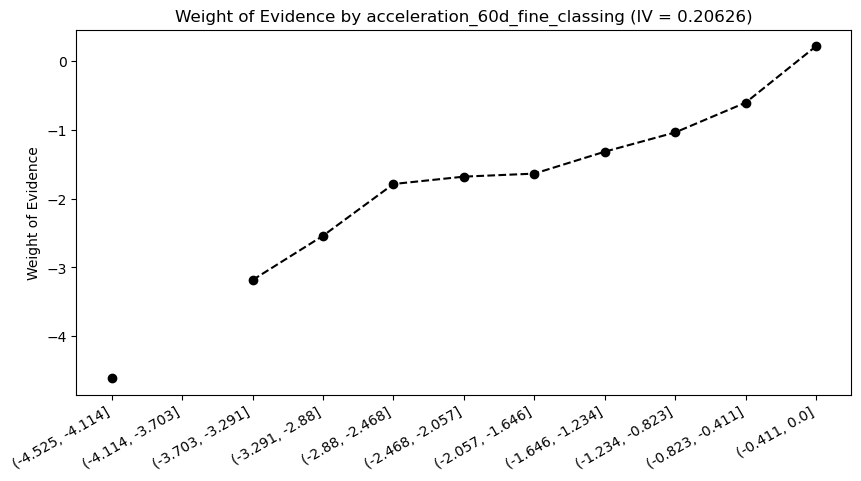

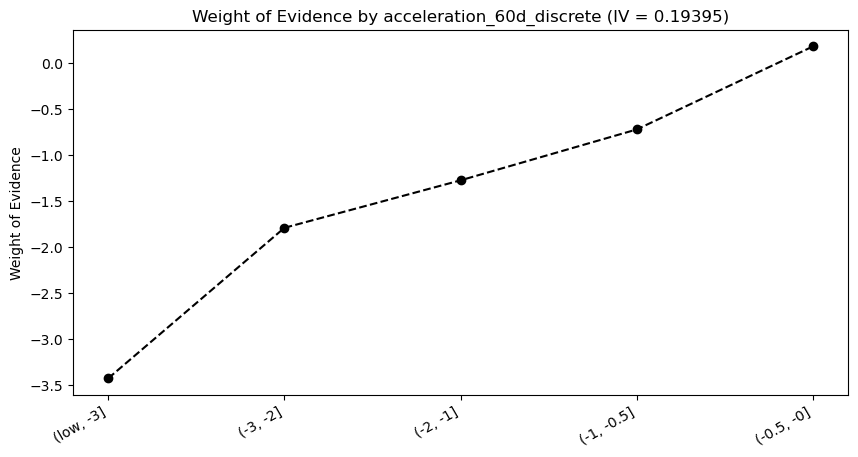

In [56]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'acceleration_60d')[1], 90)
def acceleration_60d_discrete(acceleration_60d):
    if acceleration_60d <= -3:
        return '(low, -3]'
    if acceleration_60d <= -2:
        return '(-3, -2]'
    if acceleration_60d <= -1:
        return '(-2, -1]'
    if acceleration_60d <= -0.5:
        return '(-1, -0.5]'
    if acceleration_60d <= 0:
        return '(-0.5, -0]'
    return '(0, high)'

loan_data_train['acceleration_60d_discrete'] = loan_data_train['acceleration_60d'].apply(lambda x: acceleration_60d_discrete(x))
loan_data_test['acceleration_60d_discrete'] = loan_data_test['acceleration_60d'].apply(lambda x: acceleration_60d_discrete(x))
loan_data['acceleration_60d_discrete'] = loan_data['acceleration_60d'].apply(lambda x: acceleration_60d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'acceleration_60d_discrete'),90)

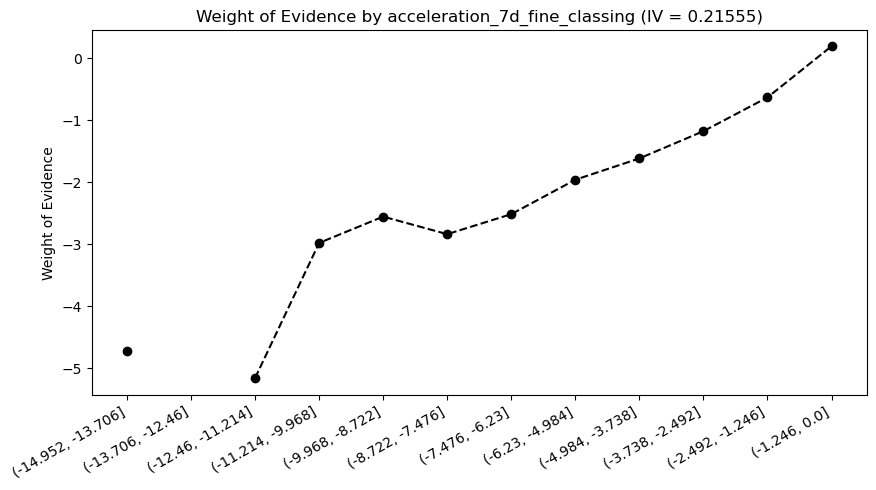

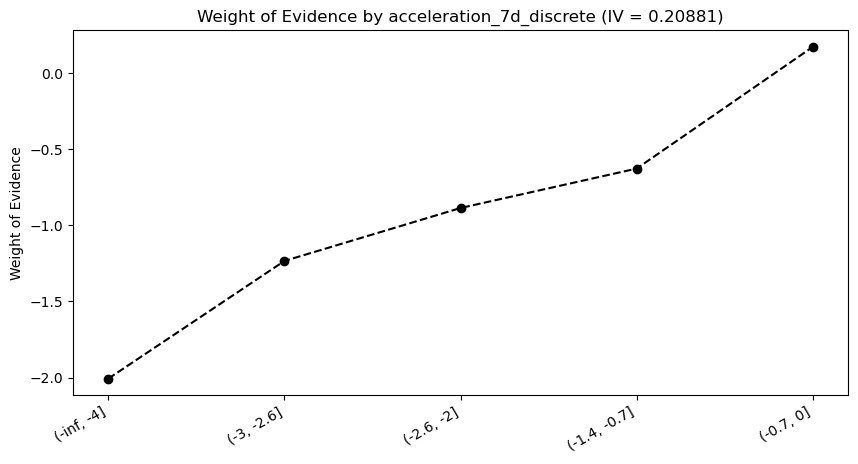

In [57]:
plot_by_woe(woe_continuous_best_class_count(loan_data, 'acceleration_7d')[1], 90)
def acceleration_7d_discrete(acceleration_7d):
    if acceleration_7d <= -4:
        return '(-inf, -4]'
    if acceleration_7d <= -2.6:
        return '(-3, -2.6]'
    if acceleration_7d <= -2:
        return '(-2.6, -2]'
    if acceleration_7d <= -1.4:
        return '(-1.4, -0.7]'
    if acceleration_7d <= 0:
        return '(-0.7, 0]'
    return '(0, high)'

loan_data_train['acceleration_7d_discrete'] = loan_data_train['acceleration_7d'].apply(lambda x: acceleration_7d_discrete(x))
loan_data_test['acceleration_7d_discrete'] = loan_data_test['acceleration_7d'].apply(lambda x: acceleration_7d_discrete(x))
loan_data['acceleration_7d_discrete'] = loan_data['acceleration_7d'].apply(lambda x: acceleration_7d_discrete(x))
plot_by_woe(woe_discrete(loan_data_train, 'acceleration_7d_discrete'),90)

In [58]:
# plot_by_woe(woe_continuous_best_class_count(loan_data, 'amt30_cnt_27d')[1], 90)
# def amt30_cnt_27d_discrete(amt30_cnt_27d):
#     if amt30_cnt_27d <= 6:
#         return '(-inf, 6]'
#     if amt30_cnt_27d <= 12:
#         return '(6, 12]'
#     if amt30_cnt_27d <= 18:
#         return '(12, 18]'
#     if amt30_cnt_27d <= 24:
#         return '(18, 24]'
#     return '(24, high)'

# loan_data_train['amt30_cnt_27d_discrete'] = loan_data_train['amt30_cnt_27d'].apply(lambda x: amt30_cnt_27d_discrete(x))
# loan_data_test['amt30_cnt_27d_discrete'] = loan_data_test['amt30_cnt_27d'].apply(lambda x: amt30_cnt_27d_discrete(x))
# loan_data['amt30_cnt_27d_discrete'] = loan_data['amt30_cnt_27d'].apply(lambda x: amt30_cnt_27d_discrete(x))
# plot_by_woe(woe_discrete(loan_data_train, 'amt30_cnt_27d_discrete'),90)

In [59]:
# # List of columns you're interested in
# interested_cols = ['amt30_cnt_21d', 'term_permanent_flag_cnt_14d', 
#                    'male_cnt_3d', 'Single_cnt_28d','idcard_cnt_3d','idcard_rej_cnt_3d']

In [60]:
# # List of columns you're interested in
# interested_cols = ['male_cnt_28d', 'idcard_cnt_28d', 'refphone_cnt_28d', 'app_cnt_28d', 
#                    'idcard_rej_cnt_28d', 'denied_cnt_28d', 'Single_cnt_28d', 
#                    'outSideAppPermanent_cnt_28d', 'stable_and_self_employed_rate_cnt_28d', 
#                    'nonViettel_cnt_28d','term_permanent_flag_cnt_21d']

In [61]:
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures
# import sklearn

# # Create polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# poly_features = poly.fit_transform(loan_data[interested_cols])

# # Check sklearn version for compatibility
# if sklearn.__version__ >= '0.22':
#     feature_names = poly.get_feature_names_out(input_features=interested_cols)
# else:
#     feature_names = poly.get_feature_names(input_features=interested_cols)

# poly_features_df = pd.DataFrame(poly_features, columns=feature_names)

# # Concatenate the polynomial features to your loan_data dataframe
# loan_data_extended = pd.concat([loan_data, poly_features_df], axis=1)

# # Now loop through each of the new polynomial features to calculate WoE and IV
# df_polynomial_iv = pd.DataFrame(poly_features_df.columns).rename(columns={0: 'POLYNOMIAL_FEATURE'})
# df_polynomial_iv['IV'], df_polynomial_iv['IV_ADJUSTED'], df_polynomial_iv['BINS'] = '', '', ''

# for feature in poly_features_df.columns:
#     # Calculate WoE and IV using your existing function, make sure to handle any errors or issues with constant columns
#     try:
#         woe_iv_df = woe_continuous_best_class_count(loan_data_extended, feature)
#         df_polynomial_iv.loc[df_polynomial_iv['POLYNOMIAL_FEATURE'] == feature, 'IV'] = woe_iv_df[1]['IV'][0]
#         df_polynomial_iv.loc[df_polynomial_iv['POLYNOMIAL_FEATURE'] == feature, 'IV_ADJUSTED'] = woe_iv_df[1]['IV_adjusted'][0]
#         df_polynomial_iv.loc[df_polynomial_iv['POLYNOMIAL_FEATURE'] == feature, 'BINS'] = woe_iv_df[2]
#     except ValueError as e:
#         print(f"Error with feature {feature}: {e}")

# # Sort the features based on adjusted IV to find the most predictive new features
# df_polynomial_iv_sorted = df_polynomial_iv.sort_values(['IV_ADJUSTED', 'IV'], ascending=[False, True]).reset_index(drop=True)

# # Display the top rows with the highest IV scores
# df_polynomial_iv_sorted.head(100)


In [62]:
# loan_data_extended.head()

In [63]:
# # It seems you want to filter your DataFrame to specific rows, not columns. 
# # We assume you want to keep rows where 'CONTINUOUS_COL' is in your list of interests.
# df_continuous_IV_gt_02 = df_continuous[df_continuous['CONTINUOUS_COL'].isin(interested_cols)]

# # Now, you're binning each selected continuous variable and adding it as a new column in loan_data
# for i in range(len(df_continuous_IV_gt_02)):
#     col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
#     bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    
#     # Create a new binned column in the loan_data DataFrame
#     loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
#     print(f"{col} binned!")  # Using f-strings for better readability

# # For each column, you're now recalculating WoE and plotting it
# for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
#     # Since you're recalculating WoE, it seems unnecessary because you already have this information from earlier.
#     # However, if it's intentional (maybe your data has updated), you can proceed as follows.
#     results = woe_continuous_best_class_count(loan_data, col)
#     woe_results = results[1]  # I'm assuming this is a DataFrame with WoE values
    
#     # Now, you want to plot the WoE values. I assume plot_by_woe is a predefined function that accepts a DataFrame.
#     plot_by_woe(woe_results)

In [64]:
selected_cols = []
# selected_cols.extend(cat_cols)
selected_cols.extend(selected_discrete_cols)
selected_cols.extend(selected_continuous_cols)
selected_cols

['region_tier',
 'male_cnt_28d_discrete',
 'outSideAppPermanent_cnt_28d_discrete',
 'idcard_rej_cnt_14d_discrete',
 'Single_cnt_28d_discrete',
 'refphone_cnt_28d_discrete',
 'app_cnt_14d_discrete',
 'term_permanent_flag_cnt_28d_discrete',
 'userTriggerNew_cnt_28d_discrete',
 'nonViettel_cnt_28d_discrete',
 'acceleration_14d_discrete',
 'acceleration_28d_discrete',
 'acceleration_60d_discrete',
 'acceleration_7d_discrete']

In [65]:
# create dummies for selected columns
dummies = pd.get_dummies(loan_data, prefix=selected_cols, prefix_sep=':', columns=selected_cols)

# concatenate dummies with original dataset
result = pd.concat([loan_data, dummies], axis=1)

# display the result
result.head(1)

,MONTH,region_tier,vnpostUserName,loan_date,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg14d,mean_distance_sellOrg7d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_28d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,BAD_lock,velocity_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,acceleration_3d,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,BAD,day_of_week,day_of_month,month,quarter,year,app_cnt_1d_fine_classing,app_cnt_3d_fine_classing,app_cnt_7d_fine_classing,app_cnt_14d_fine_classing,app_cnt_28d_fine_classing,app_cnt_60d_fine_classing,approve_cnt_3d_fine_classing,approve_cnt_7d_fine_classing,approve_cnt_14d_fine_classing,approve_cnt_28d_fine_classing,stable_and_self_employed_rate_cnt_3d_fine_classing,stable_and_self_employed_rate_cnt_7d_fine_classing,stable_and_self_employed_rate_cnt_14d_fine_classing,stable_and_self_employed_rate_cnt_28d_fine_classing,outSideApp_cnt_7d_fine_classing,outSideApp_cnt_14d_fine_classing,outSideApp_cnt_28d_fine_classing,outSideAppPermanent_cnt_7d_fine_classing,outSideAppPermanent_cnt_14d_fine_classing,outSideAppPermanent_cnt_28d_fine_classing,term_permanent_flag_cnt_7d_fine_classing,term_permanent_flag_cnt_14d_fine_classing,term_permanent_flag_cnt_28d_fine_classing,idTrigger_cnt_7d_fine_classing,idTrigger_cnt_14d_fine_classing,idTrigger_cnt_28d_fine_classing,phoneTrigger_cnt_7d_fine_classing,phoneTrigger_cnt_14d_fine_classing,phoneTrigger_cnt_28d_fine_classing,userTriggerNew_cnt_7d_fine_classing,userTriggerNew_cnt_14d_fine_classing,userTriggerNew_cnt_28d_fine_classing,createTimeTrigger_cnt_7d_fine_classing,createTimeTrigger_cnt_14d_fine_classing,createTimeTrigger_cnt_28d_fine_classing,emailTrigger_cnt_7d_fine_classing,emailTrigger_cnt_14d_fine_classing,emailTrigger_cnt_28d_fine_classing,addressTrigger_cnt_7d_fine_classing,addressTrigger_cnt_14d_fine_classing,addressTrigger_cnt_28d_fine_classing,mean_distance_sellOrg14d_fine_classing,mean_distance_sellOrg7d_fine_classing,mean_distance_sellOrg28d_fine_classing,distance_sellerOrg_locationCreate_km_cnt_7d_fine_classing,distance_sellerOrg_locationCreate_km_cnt_14d_fine_classing,distance_sellerOrg_locationCreate_km_cnt_28d_fine_classing,distance_sellerProvince_loc

In [66]:
# selected_continuous_cols1 = df_continuous_IV_gt_02['CONTINUOUS_COL'].tolist()
# selected_continuous_cols1 = [x + '_bin' for x in selected_continuous_cols1]
# selected_continuous_cols1

In [67]:
pd.options.display.max_rows = 15
list_dummies = [pd.get_dummies(loan_data_train[col], prefix = col, prefix_sep = ':').iloc[:, :-1] for col in selected_cols]
X_train = pd.concat(list_dummies, axis = 1)
X_train.head()

,region_tier:Null,region_tier:TIER_1,region_tier:TIER_2,"male_cnt_28d_discrete:(0, 9]","male_cnt_28d_discrete:(17, 26]","male_cnt_28d_discrete:(26, 34]","male_cnt_28d_discrete:(34, 43]","male_cnt_28d_discrete:(43, 51]","male_cnt_28d_discrete:(51, 59]","male_cnt_28d_discrete:(59, 68]","male_cnt_28d_discrete:(68, high)","outSideAppPermanent_cnt_28d_discrete:(0, 12]","outSideAppPermanent_cnt_28d_discrete:(12, 24]","outSideAppPermanent_cnt_28d_discrete:(24, 36]","outSideAppPermanent_cnt_28d_discrete:(36, 48]","outSideAppPermanent_cnt_28d_discrete:(48, 71]","idcard_rej_cnt_14d_discrete:(0, 7]","idcard_rej_cnt_14d_discrete:(13, 19]","idcard_rej_cnt_14d_discrete:(19, 26]","idcard_rej_cnt_14d_discrete:(26, 32]","idcard_rej_cnt_14d_discrete:(32, 45]","idcard_rej_cnt_14d_discrete:(45, 51]","idcard_rej_cnt_14d_discrete:(51, 56]","idcard_rej_cnt_14d_discrete:(56, high)","Single_cnt_28d_discrete:(0, 7]","Single_cnt_28d_discrete:(21, 27]","Single_cnt_28d_discrete:(41, high)","refphone_cnt_28d_discrete:(0, 11]","refphone_cnt_28d_discrete:(11, 22]","refphone_cnt_28d_discrete:(22, 33]","refphone_cnt_28d_discrete:(33, 42]","refphone_cnt_28d_discrete:(42, 54]","refphone_cnt_28d_discrete:(54, 65]","refphone_cnt_28d_discrete:(65, 75]","refphone_cnt_28d_discrete:(75, 86]","app_cnt_14d_discrete:(0, 16]","app_cnt_14d_discrete:(0, 24]","app_cnt_14d_discrete:(0, 32]","app_cnt_14d_discrete:(0, 40]","app_cnt_14d_discrete:(0, 48]","app_cnt_14d_discrete:(0, 56]","app_cnt_14d_discrete:(0, 64]","app_cnt_14d_discrete:(0, 8]","term_permanent_flag_cnt_28d_discrete:(0, 12]","term_permanent_flag_cnt_28d_discrete:(12, 24]","term_permanent_flag_cnt_28d_discrete:(24, 35]","term_permanent_flag_cnt_28d_discrete:(35, 47]","term_permanent_flag_cnt_28d_discrete:(47, 58]","term_permanent_flag_cnt_28d_discrete:(58, 70]","userTriggerNew_cnt_28d_discrete:(0, 1]","userTriggerNew_cnt_28d_discrete:(0, 2]","userTriggerNew_cnt_28d_discrete:(0, 4]","userTriggerNew_cnt_28d_discrete:(0, 6]","nonViettel_cnt_28d_discrete:(0, 7]","nonViettel_cnt_28d_discrete:(13, 20]","nonViettel_cnt_28d_discrete:(20, 32]","nonViettel_cnt_28d_discrete:(32, 40]","nonViettel_cnt_28d_discrete:(40, high)","acceleration_14d_discrete:(-1, 0]","acceleration_14d_discrete:(-2, -1]","acceleration_14d_discrete:(-3, -2]","acceleration_14d_discrete:(-4, -3]","acceleration_14d_discrete:(-5, -4]","acceleration_14d_discrete:(-6, -5]","acceleration_14d_discrete:(-7, -6]","acceleration_28d_discrete:(-1, 0]","acceleration_28d_discrete:(-7, -1]","acceleration_60d_discrete:(-0.5, -0]","acceleration_60d_discrete:(-1, -0.5]","acceleration_60d_discrete:(-2, -1]","acceleration_60d_discrete:(-3, -2]","acceleration_7d_discrete:(-0.7, 0]","acceleration_7d_discrete:(-1.4, -0.7]","acceleration_7d_discrete:(-2.6, -2]","acceleration_7d_discrete:(-3, -2.6]"
66194,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
122325,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
133359,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2276,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
81970,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [68]:
y_train = loan_data_train['BAD'].astype(int)

In [69]:
pd.options.display.max_rows = 15
list_dummies = [pd.get_dummies(loan_data_test[col], prefix = col, prefix_sep = ':').iloc[:, :-1] for col in selected_cols]
X_test = pd.concat(list_dummies, axis = 1)

In [70]:
y_test = loan_data_test['BAD'].astype(int)

In [71]:
# Print the shape of your training and testing sets
print("Training data shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing target shape:", y_test.shape)

Training data shape: (145053, 75)
Training target shape: (145053,)
Testing data shape: (36264, 75)
Testing target shape: (36264,)


In [72]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm


In [73]:
# Define the sampling methods to be compared
samplers = [
    ("RandomOverSampler", RandomOverSampler()),
    ("SMOTE", SMOTE()),
    ("RandomUnderSampler", RandomUnderSampler())]

# Train and evaluate the model with each sampling method
for sampler_name, sampler in samplers:
    # Apply the sampling method to the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    
    # Train the machine learning model
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_resampled, y_resampled)
    
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{sampler_name}: Accuracy = {accuracy:.3f}, Precision = {precision:.3f}, Recall = {recall:.3f}, F1 score = {f1:.3f}")


RandomOverSampler: Accuracy = 0.788, Precision = 0.292, Recall = 0.379, F1 score = 0.799
SMOTE: Accuracy = 0.796, Precision = 0.297, Recall = 0.353, F1 score = 0.803
RandomUnderSampler: Accuracy = 0.765, Precision = 0.273, Recall = 0.426, F1 score = 0.785


In [74]:
# Define the resampling method
method = SMOTE()
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# X_test, y_test = smote.fit_resample(X_test, y_test)

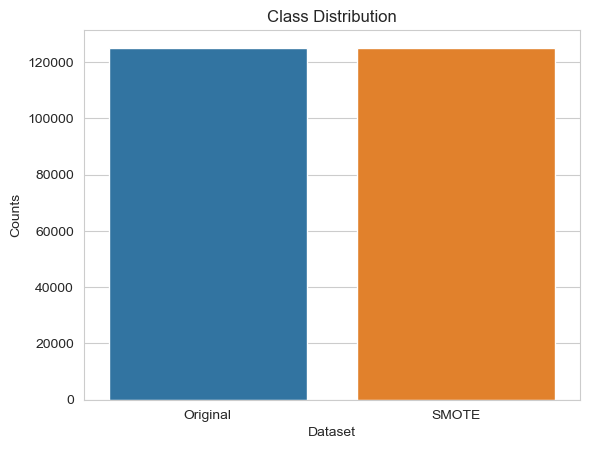

In [75]:
# Set the seaborn style
sns.set_style("whitegrid")

# Create the bar plots
ax = sns.barplot(x=["Original", "SMOTE"], y=[y_train.value_counts()[0], y_train_smote.value_counts()[1]])

# Add labels and title
ax.set(xlabel='Dataset', ylabel='Counts', title='Class Distribution')
plt.show()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [77]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
model_smote = RandomForestClassifier()
model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [78]:
y_pred = model.predict(X_test)
y_pred_smote = model_smote.predict(X_test)

print("Accuracy of original data: ", accuracy_score(y_test, y_pred))
print("Precision of original data: ", precision_score(y_test, y_pred))
print("Recall of original data: ", recall_score(y_test, y_pred))
print("F1-score of original data: ", f1_score(y_test, y_pred))

print("Accuracy of SMOTE data: ", accuracy_score(y_test, y_pred_smote))
print("Precision of SMOTE data: ", precision_score(y_test, y_pred_smote))
print("Recall of SMOTE data: ", recall_score(y_test, y_pred_smote))
print("F1-score of SMOTE data: ", f1_score(y_test, y_pred_smote))

Accuracy of original data:  0.8762960511802338
Precision of original data:  0.7007936507936507
Recall of original data:  0.17688301282051283
F1-score of original data:  0.28246960972488805
Accuracy of SMOTE data:  0.7908669755129054
Precision of SMOTE data:  0.2878887070376432
Recall of SMOTE data:  0.35236378205128205
F1-score of SMOTE data:  0.3168798414700054


In [79]:
#Function for Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


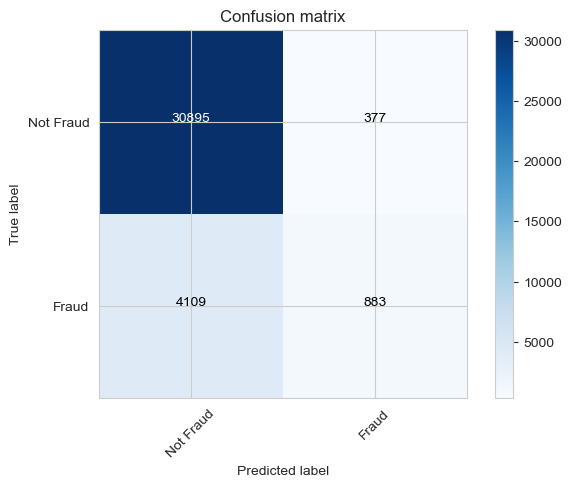

In [80]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not Fraud','Fraud'])

In [81]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.99      0.93     31272
       Fraud       0.70      0.18      0.28      4992

    accuracy                           0.88     36264
   macro avg       0.79      0.58      0.61     36264
weighted avg       0.86      0.88      0.84     36264



Confusion matrix, without normalization


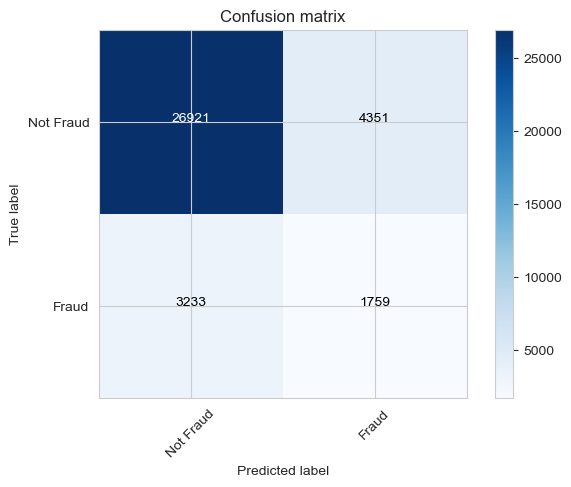

In [82]:
cm = metrics.confusion_matrix(y_test, y_pred_smote)
plot_confusion_matrix(cm, classes=['Not Fraud','Fraud'])

In [83]:
print(classification_report(y_test, y_pred_smote, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      0.86      0.88     31272
       Fraud       0.29      0.35      0.32      4992

    accuracy                           0.79     36264
   macro avg       0.59      0.61      0.60     36264
weighted avg       0.81      0.79      0.80     36264



In [84]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [85]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Creating the objects
logreg_cv = LogisticRegression(solver='liblinear', random_state=123)
dt_cv = DecisionTreeClassifier(random_state=19)
nb_cv = GaussianNB()
rf_cv = RandomForestClassifier(random_state=19)
gb_cv = GradientBoostingClassifier(random_state=19)
knn_cv = KNeighborsClassifier()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Naive Bayes', 3: 'Random Forest', 4: 'Gradient Boosting', 5: 'K-Nearest Neighbors'}
cv_models = [logreg_cv, dt_cv, nb_cv, rf_cv, gb_cv, knn_cv]

from sklearn.metrics import precision_score, recall_score, f1_score

def display_results(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Training Accuracy: {:.2f}".format(train_accuracy))
    print("Test Accuracy: {:.2f}".format(test_accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1))
    print("Confusion Matrix:")
    print(cm)
    print("\n")

    return train_accuracy, test_accuracy

for i, model in enumerate(cv_models):
    print("{}:".format(cv_dict[i]))
    train_acc, test_acc = display_results(model, X_train_smote, y_train_smote, X_test, y_test)
    overfitting = train_acc > test_acc
    print("Overfitting: {}\n".format(overfitting))


Logistic Regression:
Training Accuracy: 0.62
Test Accuracy: 0.74
Precision: 0.22
Recall: 0.33
F1-score: 0.26
Confusion Matrix:
[[25326  5946]
 [ 3350  1642]]


Overfitting: False

Decision Tree:
Training Accuracy: 0.68
Test Accuracy: 0.79
Precision: 0.28
Recall: 0.35
F1-score: 0.31
Confusion Matrix:
[[26844  4428]
 [ 3267  1725]]


Overfitting: False

Naive Bayes:
Training Accuracy: 0.61
Test Accuracy: 0.86
Precision: 0.44
Recall: 0.14
F1-score: 0.21
Confusion Matrix:
[[30401   871]
 [ 4300   692]]


Overfitting: False

Random Forest:
Training Accuracy: 0.68
Test Accuracy: 0.79
Precision: 0.29
Recall: 0.35
F1-score: 0.32
Confusion Matrix:
[[26929  4343]
 [ 3223  1769]]


Overfitting: False

Gradient Boosting:
Training Accuracy: 0.63
Test Accuracy: 0.77
Precision: 0.27
Recall: 0.38
F1-score: 0.32
Confusion Matrix:
[[26181  5091]
 [ 3091  1901]]


Overfitting: False

K-Nearest Neighbors:
Training Accuracy: 0.63
Test Accuracy: 0.64
Precision: 0.18
Recall: 0.47
F1-score: 0.26
Confusion Mat

In [86]:
# Now we use SMOTE variable to calculate
X_train, y_train= X_train_smote, y_train_smote

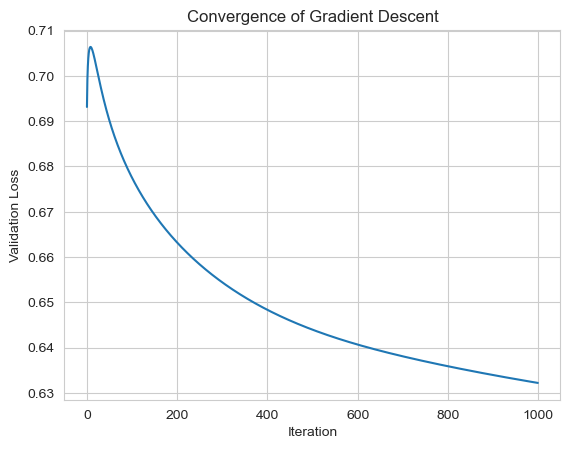

In [87]:
X_val = X_test
y_val = y_test
# Initialize parameters
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
num_iterations = 1000

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Initialize an empty list to store the validation losses
val_losses = []

# Perform Batch Gradient Descent
for i in range(num_iterations):
    z_train = np.dot(X_train, weights) + bias
    z_val = np.dot(X_val, weights) + bias
    
    y_train_pred = logistic_function(z_train)
    y_val_pred = logistic_function(z_val)
    
    gradient_weights = np.dot(X_train.T, (y_train_pred - y_train)) / y_train.shape[0]
    gradient_bias = np.sum(y_train_pred - y_train) / y_train.shape[0]
    
    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias
    
    loss = cross_entropy_loss(y_val, y_val_pred)
    val_losses.append(loss)

# Plot the validation loss curve
plt.plot(range(num_iterations), val_losses)
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.title("Convergence of Gradient Descent")
plt.show()

In [88]:
from sklearn.model_selection import learning_curve

In [89]:
# Concatenate X_train and X_test for the learning curve
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

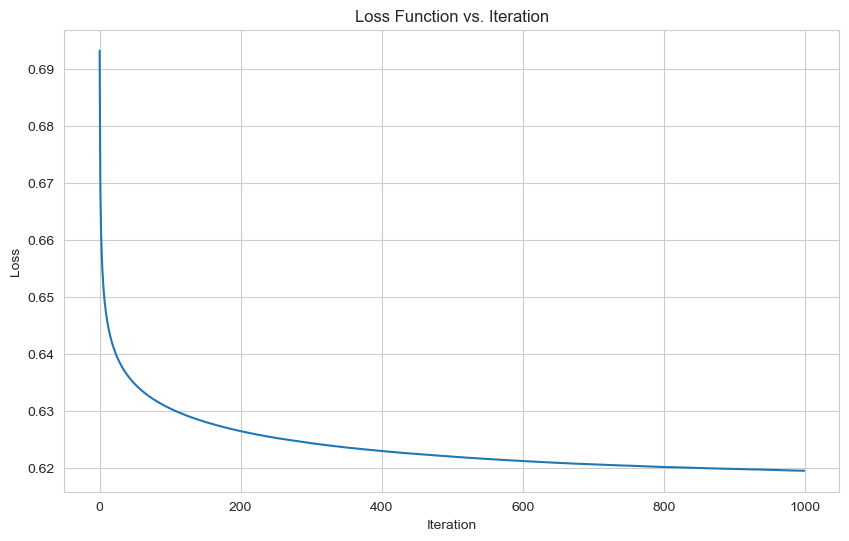

Minimum loss: 0.6195 at iteration 999


In [90]:
# 2. Define the logistic function and cross-entropy loss function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 3. Initialize the parameters (weights and bias) and hyperparameters (learning rate and number of iterations)
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
num_iterations = 1000

# 4. Implement the gradient descent algorithm to update the weights and bias
losses = []
for i in range(num_iterations):
    linear_output = np.dot(X_train, weights) + bias
    y_pred = logistic_function(linear_output)
    loss = cross_entropy_loss(y_train, y_pred)
    losses.append(loss)

    gradient_weights = np.dot(X_train.T, (y_pred - y_train)) / X_train.shape[0]
    gradient_bias = np.sum(y_pred - y_train) / X_train.shape[0]

    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias

# 5. Calculate the loss for each iteration and store it in a list
# ... (the losses list already contains the loss for each iteration)

# 6. Plot the loss function over the iterations and find the minimum point
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function vs. Iteration")
plt.show()

min_loss_idx = np.argmin(losses)
min_loss = losses[min_loss_idx]
print(f"Minimum loss: {min_loss:.4f} at iteration {min_loss_idx}")

In [91]:
class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = LogisticRegression(*args, **kwargs)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2.0*(1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        try:
            Cramer_Rao = np.linalg.inv(F_ij)
        except np.linalg.LinAlgError:
            Cramer_Rao = np.linalg.pinv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [2 * (1 - stats.norm.cdf(abs(x))) for x in z_scores]
        self.sigma_estimates = sigma_estimates
        self.z_scores = z_scores
        self.p_values = p_values
        return self.model
    def fit_sgd(self, X, y, learning_rate=0.01, num_iterations=1000):
        # Initialize parameters
        weights = np.zeros(X.shape[1])
        bias = 0

        # Define the logistic function
        def logistic_function(z):
            return 1 / (1 + np.exp(-z))

        # Define the cross-entropy loss function
        def cross_entropy_loss(y_true, y_pred):
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # Initialize an empty list to store the losses
        losses = []

        # Perform Stochastic Gradient Descent
        for i in range(num_iterations):
            for j in range(X.shape[0]):
                x_sample = X[j]
                y_sample = y[j]

                linear_output = np.dot(x_sample, weights) + bias
                y_pred = logistic_function(linear_output)

                gradient_weights = np.dot(x_sample.T, (y_pred - y_sample)) / x_sample.shape[0]
                gradient_bias = np.sum(y_pred - y_sample) / x_sample.shape[0]

                weights -= learning_rate * gradient_weights
                bias -= learning_rate * gradient_bias

            # Calculate the loss after an epoch and store it
            linear_output = np.dot(X, weights) + bias
            y_pred = logistic_function(linear_output)
            loss = cross_entropy_loss(y, y_pred)
            losses.append(loss)

        self.losses = losses
        self.weights = weights
        self.bias = bias

        return self
    def fit_gd_momentum(self, X, y, learning_rate=0.01, num_iterations=1000, gamma=0.9):
        X = X.to_numpy()
        y = y.to_numpy().reshape(-1, 1)
        n_features = X.shape[1]
        
        weights = np.zeros((n_features, 1))
        bias = 0
        momentum_w = np.zeros((n_features, 1))
        momentum_b = 0

        for _ in range(num_iterations):
            linear_output = np.dot(X, weights) + bias
            y_pred = self.logistic_function(linear_output)
            
            gradient_weights = np.dot(X.T, (y_pred - y)) / X.shape[0]
            gradient_bias = np.sum(y_pred - y) / X.shape[0]
            
            momentum_w = gamma * momentum_w + learning_rate * gradient_weights
            momentum_b = gamma * momentum_b + learning_rate * gradient_bias
            
            weights -= momentum_w
            bias -= momentum_b
        
        self.model.coef_ = weights.T
        self.model.intercept_ = bias

    def fit_nag(self, X, y, learning_rate=0.01, num_iterations=1000, gamma=0.9):
        X = X.to_numpy()
        y = y.to_numpy().reshape(-1, 1)
        n_features = X.shape[1]
        
        weights = np.zeros((n_features, 1))
        bias = 0
        momentum_w = np.zeros((n_features, 1))
        momentum_b = 0

        for _ in range(num_iterations):
            lookahead_weights = weights - gamma * momentum_w
            lookahead_bias = bias - gamma * momentum_b
            
            linear_output = np.dot(X, lookahead_weights) + lookahead_bias
            y_pred = self.logistic_function(linear_output)
            
            gradient_weights = np.dot(X.T, (y_pred - y)) / X.shape[0]
            gradient_bias = np.sum(y_pred - y) / X.shape[0]
            
            momentum_w = gamma * momentum_w + learning_rate * gradient_weights
            momentum_b = gamma * momentum_b + learning_rate * gradient_bias
            
            weights -= momentum_w
            bias -= momentum_b
        
        self.model.coef_ = weights.T
        self.model.intercept_ = bias
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        return self.model.score(X, y)
        
    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        return self.model.set_params(**params)


# Set option to display all rows of a DataFrame
pd.set_option('display.max_rows', None)

# Create a LogisticRegression_with_p_values object and fit the model
reg = LogisticRegression_with_p_values()
reg.fit(X_train, y_train)

# Create the summary table
summary_table = pd.DataFrame(columns=['Feature name'], data=X_train.columns.values)
summary_table['Coefficients'] = np.transpose(reg.model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.model.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [92]:
def plot_decision_boundary(X, y, model, method, ax):
    # Prepare data
    X = X.to_numpy()  # Convert to NumPy array
    y = y.to_numpy().flatten()
    
    if method == "sgd":
        model.fit_sgd(X, y)
    elif method == "momentum":
        model.fit_gd_momentum(X, y)
    elif method == "nag":
        model.fit_nag(X, y)
    else:
        raise ValueError("Invalid method")
    
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o", s=50)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"Decision boundary for {method.upper()}")
    
    # Produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.add_artist(legend1)


In [93]:
summary_table[summary_table['p_values'] < 0.05]

,Feature name,Coefficients,p_values
1,region_tier:Null,-0.811759,3.763654e-03
2,region_tier:TIER_1,0.022430,0.000000e+00
3,region_tier:TIER_2,0.061099,0.000000e+00
4,"male_cnt_28d_discrete:(0, 9]",0.044546,0.000000e+00
5,"male_cnt_28d_discrete:(17, 26]",0.350251,0.000000e+00
6,"male_cnt_28d_discrete:(26, 34]",0.814071,0.000000e+00
7,"male_cnt_28d_discrete:(34, 43]",0.989972,0.000000e+00
8,"male_cnt_28d_discrete:(43, 51]",1.757003,0.000000e+00
9,"male_cnt_28d_discrete:(51, 59]",1.089317,0.000000e+00
10,"male_cnt_28d_discrete:(59, 68]",0.967483,4.196643e-14


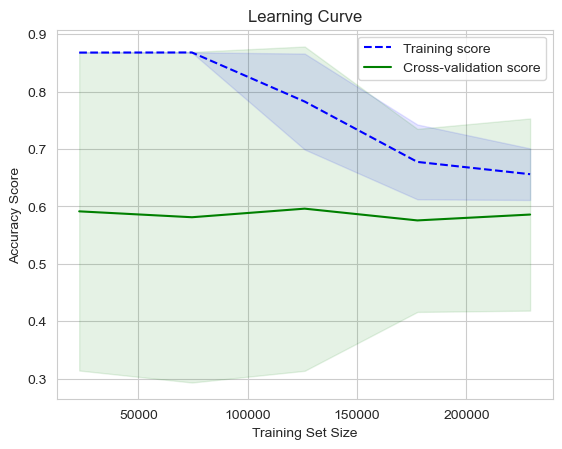

In [94]:
from sklearn.model_selection import learning_curve

def plot_learning_curve_custom(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="blue", label="Training score")
    plt.plot(train_sizes, val_mean, color="green", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.1)

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.show()

# Instantiate the custom class
reg = LogisticRegression_with_p_values()

# Plot the learning curve using the custom class
plot_learning_curve_custom(reg, X, y)


In [95]:
reg.fit(X_train, y_train)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
Y_hat_train_proba = reg.model.predict_proba(X_train)[: ][: , 1]
Y_hat_train_proba

array([0.47056202, 0.39878203, 0.47580918, ..., 0.39878203, 0.40808846,
       0.49457609])

In [96]:
pd.options.display.max_rows = 15
df_actual_predicted = pd.concat([y_train, pd.DataFrame(Y_hat_train_proba)], axis = 1)
df_actual_predicted.columns = ['Y_train', 'Y_hat_train_proba']
tr = 0.5
df_actual_predicted['Y_hat_train'] = np.where(df_actual_predicted['Y_hat_train_proba'] > tr, 1, 0)
df_actual_predicted

,Y_train,Y_hat_train_proba,Y_hat_train
0,0,0.470562,0
1,0,0.398782,0
2,0,0.475809,0
3,0,0.453511,0
4,0,0.398782,0
...,...,...,...
250165,1,1.000000,1
250166,1,0.398782,0
250167,1,0.398782,0
250168,1,0.408088,0


In [97]:
df_actual_predicted['Y_hat_train'].value_counts()

0    171563
1     78607
Name: Y_hat_train, dtype: int64

In [98]:
print('Confusion Matrix: (Actual by Row, Predicted by Column)')
print(confusion_matrix(df_actual_predicted['Y_train'], df_actual_predicted['Y_hat_train']))
print(classification_report(df_actual_predicted['Y_train'], df_actual_predicted['Y_hat_train']))

Confusion Matrix: (Actual by Row, Predicted by Column)
[[101149  23936]
 [ 70414  54671]]
              precision    recall  f1-score   support

           0       0.59      0.81      0.68    125085
           1       0.70      0.44      0.54    125085

    accuracy                           0.62    250170
   macro avg       0.64      0.62      0.61    250170
weighted avg       0.64      0.62      0.61    250170



Text(0.5, 1.0, 'ROC curve')

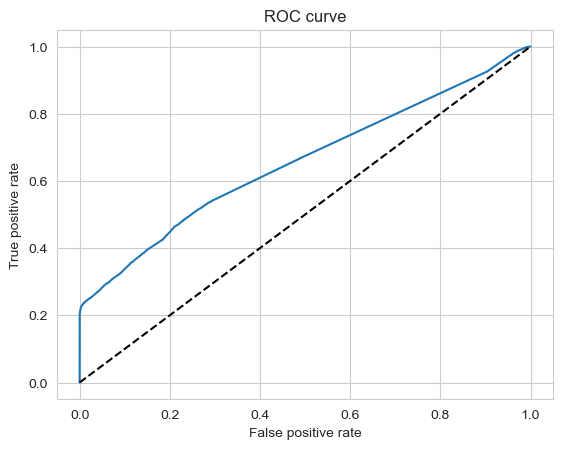

In [99]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
fpr, tpr, thresholds = roc_curve(df_actual_predicted['Y_train'],
                                 df_actual_predicted['Y_hat_train_proba'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [100]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted['Y_train'], df_actual_predicted['Y_hat_train_proba'])
AUROC

0.6556190247920457

In [101]:
df_actual_predicted = df_actual_predicted.sort_values('Y_hat_train_proba').reset_index(drop = True)
df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Y_train'].cumsum()
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Good']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / (df_actual_predicted.shape[0])
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / df_actual_predicted['Y_train'].sum()
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / (df_actual_predicted.shape[0] - df_actual_predicted['Y_train'].sum())
df_actual_predicted

,Y_train,Y_hat_train_proba,Y_hat_train,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,0,0.104980,0,1,0,1,0.000004,0.000000,0.000008
1,0,0.114159,0,2,0,2,0.000008,0.000000,0.000016
2,0,0.114159,0,3,0,3,0.000012,0.000000,0.000024
3,0,0.114159,0,4,0,4,0.000016,0.000000,0.000032
4,0,0.114305,0,5,0,5,0.000020,0.000000,0.000040
...,...,...,...,...,...,...,...,...,...
250165,1,1.000000,1,250166,125081,125085,0.999984,0.999968,1.000000
250166,1,1.000000,1,250167,125082,125085,0.999988,0.999976,1.000000
250167,1,1.000000,1,250168,125083,125085,0.999992,0.999984,1.000000
250168,1,1.000000,1,250169,125084,125085,0.999996,0.999992,1.000000


Text(0.5, 1.0, 'Gini')

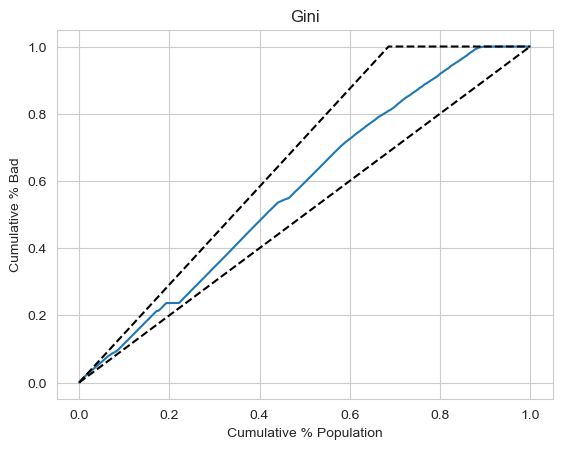

In [102]:
# Plot Gini
plt.plot(df_actual_predicted['Cumulative Perc Population'],
         df_actual_predicted['Cumulative Perc Bad'])
plt.plot(df_actual_predicted['Cumulative Perc Population'],
         df_actual_predicted['Cumulative Perc Population'],
         linestyle = '--', color = 'k')
plt.plot(df_actual_predicted['Cumulative Perc Population'],
         (1 - df_actual_predicted['Y_hat_train']).cumsum() / sum(1 - df_actual_predicted['Y_hat_train']),
         linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [103]:
# Here we calculate Gini from AUROC.
Gini = AUROC * 2 - 1
Gini

0.3112380495840914

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

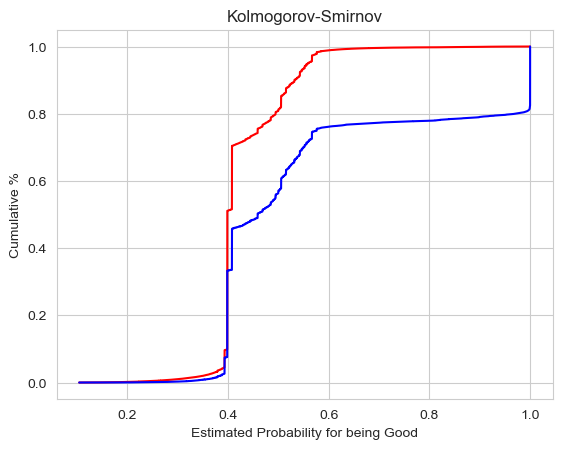

In [104]:
# Plot KS
plt.plot(df_actual_predicted['Y_hat_train_proba'], df_actual_predicted['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted['Y_hat_train_proba'], df_actual_predicted['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [105]:
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS = max(df_actual_predicted['Cumulative Perc Bad'] - df_actual_predicted['Cumulative Perc Good'])
KS

0.25356357676779795

In [106]:
for x in list(np.linspace(0, 1, 11)):
    print('Threshold:', x)
    df_actual_predicted['Y_hat_train'] = np.where(df_actual_predicted['Y_hat_train_proba'] > x, 1, 0)
    print(classification_report(df_actual_predicted['Y_train'], df_actual_predicted['Y_hat_train']))

Threshold: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    125085
           1       0.50      1.00      0.67    125085

    accuracy                           0.50    250170
   macro avg       0.25      0.50      0.33    250170
weighted avg       0.25      0.50      0.33    250170

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    125085
           1       0.50      1.00      0.67    125085

    accuracy                           0.50    250170
   macro avg       0.25      0.50      0.33    250170
weighted avg       0.25      0.50      0.33    250170

Threshold: 0.2
              precision    recall  f1-score   support

           0       0.84      0.00      0.00    125085
           1       0.50      1.00      0.67    125085

    accuracy                           0.50    250170
   macro avg       0.67      0.50      0.34    250170
weighted avg       0.67      

In [107]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
Y_hat_test_proba = reg.model.predict_proba(X_test)[: ][: , 1]
Y_hat_test_proba

array([0.62014158, 0.40808846, 0.26390106, ..., 0.40808846, 0.69984748,
       0.39878203])

In [108]:
pd.options.display.max_rows = 15
df_actual_predicted = pd.concat([y_test, pd.DataFrame(Y_hat_test_proba)], axis = 1)
df_actual_predicted.columns = ['Y_test', 'Y_hat_test_proba']
tr = 0.5
df_actual_predicted['Y_hat_test'] = np.where(df_actual_predicted['Y_hat_test_proba'] > tr, 1, 0)
df_actual_predicted = df_actual_predicted.dropna(subset=['Y_test', 'Y_hat_test_proba'])
df_actual_predicted

,Y_test,Y_hat_test_proba,Y_hat_test
8521,0.0,0.542954,1
33725,0.0,0.285317,0
35379,0.0,0.580483,1
11029,0.0,0.479982,0
35343,1.0,0.398782,0
...,...,...,...
10736,0.0,0.408088,0
21210,0.0,0.398782,0
8639,1.0,0.393417,0
26227,0.0,0.408088,0


In [109]:
df_actual_predicted['Y_hat_test'].value_counts()

0    5839
1    1549
Name: Y_hat_test, dtype: int64

In [110]:
print('Confusion Matrix: (Actual by Row, Predicted by Column)')
print(confusion_matrix(df_actual_predicted['Y_test'], df_actual_predicted['Y_hat_test']))
print(classification_report(df_actual_predicted['Y_test'], df_actual_predicted['Y_hat_test']))

Confusion Matrix: (Actual by Row, Predicted by Column)
[[4697 1278]
 [1142  271]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      5975
         1.0       0.17      0.19      0.18      1413

    accuracy                           0.67      7388
   macro avg       0.49      0.49      0.49      7388
weighted avg       0.68      0.67      0.68      7388



Text(0.5, 1.0, 'ROC curve')

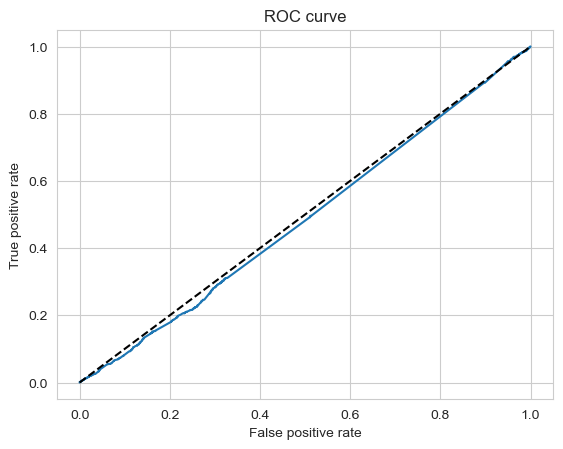

In [111]:
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
fpr, tpr, thresholds = roc_curve(df_actual_predicted['Y_test'], df_actual_predicted['Y_hat_test_proba'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [112]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted['Y_test'], df_actual_predicted['Y_hat_test_proba'])
AUROC

0.4871132076030405

In [113]:
df_actual_predicted = df_actual_predicted.sort_values('Y_hat_test_proba').reset_index(drop = True)
df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Y_test'].cumsum()
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Good']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / (df_actual_predicted.shape[0])
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / df_actual_predicted['Y_test'].sum()
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / (df_actual_predicted.shape[0] - df_actual_predicted['Y_test'].sum())
df_actual_predicted

,Y_test,Y_hat_test_proba,Y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,1.0,0.127981,0,1,1.0,0.0,0.000135,0.000708,0.000000
1,0.0,0.128912,0,2,1.0,1.0,0.000271,0.000708,0.000167
2,0.0,0.144193,0,3,1.0,2.0,0.000406,0.000708,0.000335
3,0.0,0.149332,0,4,1.0,3.0,0.000541,0.000708,0.000502
4,0.0,0.150795,0,5,1.0,4.0,0.000677,0.000708,0.000669
...,...,...,...,...,...,...,...,...,...
7383,0.0,0.927833,1,7384,1411.0,5973.0,0.999459,0.998585,0.999665
7384,1.0,0.936714,1,7385,1412.0,5973.0,0.999594,0.999292,0.999665
7385,0.0,0.941432,1,7386,1412.0,5974.0,0.999729,0.999292,0.999833
7386,1.0,0.959344,1,7387,1413.0,5974.0,0.999865,1.000000,0.999833


Text(0.5, 1.0, 'Gini')

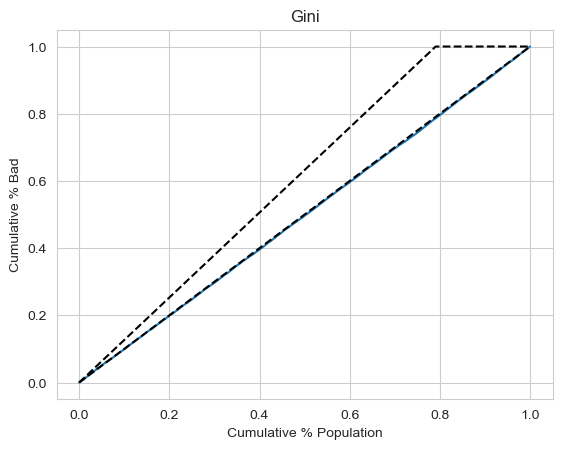

In [114]:
# Plot Gini
plt.plot(df_actual_predicted['Cumulative Perc Population'], df_actual_predicted['Cumulative Perc Bad'])
plt.plot(df_actual_predicted['Cumulative Perc Population'], df_actual_predicted['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.plot(df_actual_predicted['Cumulative Perc Population'], (1 - df_actual_predicted['Y_hat_test']).cumsum() / sum(1 - df_actual_predicted['Y_hat_test']), linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [115]:
# Here we calculate Gini from AUROC.
Gini = AUROC * 2 - 1
Gini

-0.025773584793919002

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

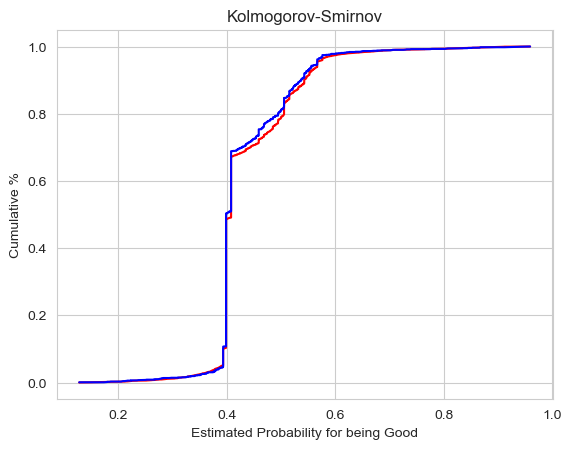

In [116]:
# Plot KS
plt.plot(df_actual_predicted['Y_hat_test_proba'], df_actual_predicted['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted['Y_hat_test_proba'], df_actual_predicted['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [117]:
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS = max(df_actual_predicted['Cumulative Perc Bad'] - df_actual_predicted['Cumulative Perc Good'])
KS

0.006388378091067109

In [118]:
for x in list(np.linspace(0, 1, 11)):
    print('Threshold:', x)
    df_actual_predicted['Y_hat_test'] = np.where(df_actual_predicted['Y_hat_test_proba'] > x, 1, 0)
    print(classification_report(df_actual_predicted['Y_test'], df_actual_predicted['Y_hat_test']))

Threshold: 0.0
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5975
         1.0       0.19      1.00      0.32      1413

    accuracy                           0.19      7388
   macro avg       0.10      0.50      0.16      7388
weighted avg       0.04      0.19      0.06      7388

Threshold: 0.1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5975
         1.0       0.19      1.00      0.32      1413

    accuracy                           0.19      7388
   macro avg       0.10      0.50      0.16      7388
weighted avg       0.04      0.19      0.06      7388

Threshold: 0.2
              precision    recall  f1-score   support

         0.0       0.78      0.00      0.00      5975
         1.0       0.19      1.00      0.32      1413

    accuracy                           0.19      7388
   macro avg       0.48      0.50      0.16      7388
weighted avg       0.67      

In [119]:
# Population Stability Index
train_BAD_perc = sum(1 - y_train) / len(y_train)
test_BAD_perc = sum(1 - y_test) / len(y_test)
PSI_BAD = (test_BAD_perc - train_BAD_perc) * np.log(test_BAD_perc / train_BAD_perc)
PSI_not_BAD = (train_BAD_perc - test_BAD_perc) * np.log((1 - test_BAD_perc) / (1 - train_BAD_perc))
[PSI_BAD, PSI_not_BAD]

[0.19749306782799328, 0.46736487878973093]

In [120]:
selected_cols

['region_tier',
 'male_cnt_28d_discrete',
 'outSideAppPermanent_cnt_28d_discrete',
 'idcard_rej_cnt_14d_discrete',
 'Single_cnt_28d_discrete',
 'refphone_cnt_28d_discrete',
 'app_cnt_14d_discrete',
 'term_permanent_flag_cnt_28d_discrete',
 'userTriggerNew_cnt_28d_discrete',
 'nonViettel_cnt_28d_discrete',
 'acceleration_14d_discrete',
 'acceleration_28d_discrete',
 'acceleration_60d_discrete',
 'acceleration_7d_discrete']

In [121]:
from tabulate import tabulate

In [122]:
# Apply woe_discrete to selected columns
woe_tables = []
for col in selected_cols:
    woe_table = woe_discrete(loan_data_train, col)
    woe_table['Features'] = woe_table[col]
    woe_table = woe_table[['Features', 'WoE', 'IV_adjusted']]
    woe_table['Column'] = col
    woe_tables.append(woe_table)

# Concatenate the dataframes
df_concat = pd.concat(woe_tables)

# Sort by the 'Features' column
df_sorted = df_concat.sort_values(['Column', 'Features'])
WoE_table = df_sorted.reset_index(drop=True)
print(tabulate(WoE_table, tablefmt="grid"))


+----+--------------+-------------+-----------+--------------------------------------+
|  0 | (0, 7]       |   0.160642  | 0.229914  | Single_cnt_28d_discrete              |
+----+--------------+-------------+-----------+--------------------------------------+
|  1 | (21, 27]     |  -1.46714   | 0.229914  | Single_cnt_28d_discrete              |
+----+--------------+-------------+-----------+--------------------------------------+
|  2 | (41, high)   |  -2.38141   | 0.229914  | Single_cnt_28d_discrete              |
+----+--------------+-------------+-----------+--------------------------------------+
|  3 | (7, 14]      |  -1.00878   | 0.229914  | Single_cnt_28d_discrete              |
+----+--------------+-------------+-----------+--------------------------------------+
|  4 | (-1, 0]      |   0.216224  | 0.236805  | acceleration_14d_discrete            |
+----+--------------+-------------+-----------+--------------------------------------+
|  5 | (-2, -1]     |  -0.534386  | 0.23680

In [123]:
def _CreditScore(beta, alpha, woe, n=10, odds=0.005, pdo=20, thres_score=600):
    """
    Tính điểm đánh giá rủi ro tín dụng dựa trên các giá trị beta và woe.
    beta: một list chứa các giá trị beta tương ứng với các biến đầu vào.
    alpha: giá trị alpha (điểm chặn) cho mô hình.
    woe: một list chứa các giá trị WOE tương ứng với các giá trị của biến đầu vào.
    n: số điểm tín dụng khác nhau được phân chia trên trục điểm.
    odds: tỷ lệ giữa khả năng xảy ra sự kiện và không xảy ra sự kiện.
    pdo: số điểm tín dụng cần thiết để tăng tỷ lệ cược đôi lên (point to double the odds).
    thres_score: giá trị ngưỡng để đảm bảo rằng điểm đánh giá không bị âm.
    """
    factor = pdo / np.log(2)
    offset = thres_score - factor * np.log(odds)
    score = (beta * woe + alpha / n) * factor + offset / n
    return score

In [124]:
betas_dict = dict(zip(list(X_train.columns), reg.model.coef_[0]))
alpha = reg.model.intercept_[0]
betas_dict

{'region_tier:Null': -0.8117593831049782,
 'region_tier:TIER_1': 0.022430123318593606,
 'region_tier:TIER_2': 0.06109945697859598,
 'male_cnt_28d_discrete:(0, 9]': 0.0445463255191444,
 'male_cnt_28d_discrete:(17, 26]': 0.350251101973646,
 'male_cnt_28d_discrete:(26, 34]': 0.8140706760131079,
 'male_cnt_28d_discrete:(34, 43]': 0.9899715582434023,
 'male_cnt_28d_discrete:(43, 51]': 1.757002545777011,
 'male_cnt_28d_discrete:(51, 59]': 1.0893171310503453,
 'male_cnt_28d_discrete:(59, 68]': 0.9674828165276523,
 'male_cnt_28d_discrete:(68, high)': 2.1800950779741637,
 'outSideAppPermanent_cnt_28d_discrete:(0, 12]': 0.055484412397036595,
 'outSideAppPermanent_cnt_28d_discrete:(12, 24]': 0.1298156629459021,
 'outSideAppPermanent_cnt_28d_discrete:(24, 36]': 0.1503307598982923,
 'outSideAppPermanent_cnt_28d_discrete:(36, 48]': 0.20789843237484254,
 'outSideAppPermanent_cnt_28d_discrete:(48, 71]': 0.9386919740463109,
 'idcard_rej_cnt_14d_discrete:(0, 7]': 0.09708641644019511,
 'idcard_rej_cnt_14

In [125]:
pd.options.display.max_rows = 15

betas_dict = dict(zip(list(X_train.columns), reg.model.coef_[0]))
alpha = reg.model.intercept_[0]

df_betas = pd.DataFrame.from_dict({'Columns': list(betas_dict.keys()), 'Betas': list(betas_dict.values())})
df_betas.head(10)

,Columns,Betas
0,region_tier:Null,-0.811759
1,region_tier:TIER_1,0.022430
2,region_tier:TIER_2,0.061099
3,"male_cnt_28d_discrete:(0, 9]",0.044546
4,"male_cnt_28d_discrete:(17, 26]",0.350251
5,"male_cnt_28d_discrete:(26, 34]",0.814071
6,"male_cnt_28d_discrete:(34, 43]",0.989972
7,"male_cnt_28d_discrete:(43, 51]",1.757003
8,"male_cnt_28d_discrete:(51, 59]",1.089317
9,"male_cnt_28d_discrete:(59, 68]",0.967483


In [126]:
WoE_table['Features']=WoE_table['Features'].astype(str)

In [127]:
pd.options.display.max_rows = 20
WoE_table['Bins'] = WoE_table['Column']+':'+ WoE_table['Features']
WoE_table

,Features,WoE,IV_adjusted,Column,Bins
0,"(0, 7]",0.160642,0.229914,Single_cnt_28d_discrete,"Single_cnt_28d_discrete:(0, 7]"
1,"(21, 27]",-1.467138,0.229914,Single_cnt_28d_discrete,"Single_cnt_28d_discrete:(21, 27]"
2,"(41, high)",-2.381406,0.229914,Single_cnt_28d_discrete,"Single_cnt_28d_discrete:(41, high)"
3,"(7, 14]",-1.008784,0.229914,Single_cnt_28d_discrete,"Single_cnt_28d_discrete:(7, 14]"
4,"(-1, 0]",0.216224,0.236805,acceleration_14d_discrete,"acceleration_14d_discrete:(-1, 0]"
...,...,...,...,...,...
84,"(0, 1]",0.082935,0.168994,userTriggerNew_cnt_28d_discrete,"userTriggerNew_cnt_28d_discrete:(0, 1]"
85,"(0, 2]",-1.315284,0.168994,userTriggerNew_cnt_28d_discrete,"userTriggerNew_cnt_28d_discrete:(0, 2]"
86,"(0, 4]",-2.033229,0.168994,userTriggerNew_cnt_28d_discrete,"userTriggerNew_cnt_28d_discrete:(0, 4]"
87,"(0, 6]",-2.288460,0.168994,userTriggerNew_cnt_28d_discrete,"userTriggerNew_cnt_28d_discrete:(0, 6]"


In [128]:
cols = []
features = []
woes = []
betas = []
scores = []

for _, row in WoE_table.iterrows():
    feature = row['Bins']
    woe = row['WoE']
    # check if feature is in df_betas['Columns']
    if feature in df_betas['Columns'].values:
        beta = df_betas.loc[df_betas['Columns'] == feature]['Betas'].values[0]
        score = _CreditScore(beta, alpha, woe)
        cols.append(row['Column'])
        features.append(row['Features'])
        woes.append(woe)
        betas.append(beta)
        scores.append(score)

df_score = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas': betas, 'Scores': scores})
df_score.head(4)

,Columns,Features,WOE,Betas,Scores
0,Single_cnt_28d_discrete,"(0, 7]",0.160642,0.047199,64.354180
1,Single_cnt_28d_discrete,"(21, 27]",-1.467138,0.203172,55.534592
2,Single_cnt_28d_discrete,"(41, high)",-2.381406,0.824084,7.510208
3,acceleration_14d_discrete,"(-1, 0]",0.216224,0.350419,66.321637


In [129]:
# Giả sử một User ngẫu nhiên có các thông số như sau
test_obs = loan_data[selected_cols].iloc[0:1, :]
test_obs

,region_tier,male_cnt_28d_discrete,outSideAppPermanent_cnt_28d_discrete,idcard_rej_cnt_14d_discrete,Single_cnt_28d_discrete,refphone_cnt_28d_discrete,app_cnt_14d_discrete,term_permanent_flag_cnt_28d_discrete,userTriggerNew_cnt_28d_discrete,nonViettel_cnt_28d_discrete,acceleration_14d_discrete,acceleration_28d_discrete,acceleration_60d_discrete,acceleration_7d_discrete
0,TIER_3,"(68, high)","(71, high)","(56, high)","(41, high)","(85, high)","(64, high)","(12, 24]","(6, high)","(40, high)","(low, -7]","(-7, -1]","(-2, -1]","(-inf, -4]"


In [130]:
def _search_score(obs, col, WoE_table):
    feature = obs[col].values[0]
    matches = (WoE_table['Columns'] == col) & (WoE_table['Features'] == feature)
    if matches.sum() == 0:  # no matching value found
        score = 0
    else:
        woe = WoE_table.loc[matches, 'WOE'].values[0]
        beta = WoE_table.loc[matches, 'Betas'].values[0]
        score = _CreditScore(beta, alpha, woe)
    return score


def _total_score(obs, columns, WoE_table):
    scores = dict()
    for col in columns:
        if obs[col].isnull().any():  # ignore missing values
            scores[col] = 0
        else:
            scores[col] = _search_score(obs, col, WoE_table)
    total_score = sum(scores.values())
    return scores, total_score

In [131]:
scores, total_score = _total_score(test_obs, columns=selected_cols, WoE_table=df_score)

print('Scores for each field:')
for col, score in scores.items():
    print(f'{col}: {score}')

print('Final total score:', total_score)

Scores for each field:
region_tier: 0
male_cnt_28d_discrete: -80.55355356981025
outSideAppPermanent_cnt_28d_discrete: 0
idcard_rej_cnt_14d_discrete: -81.44360673470788
Single_cnt_28d_discrete: 7.510207584915463
refphone_cnt_28d_discrete: 0
app_cnt_14d_discrete: 0
term_permanent_flag_cnt_28d_discrete: 62.77303664521679
userTriggerNew_cnt_28d_discrete: 0
nonViettel_cnt_28d_discrete: 58.08292645311717
acceleration_14d_discrete: 0
acceleration_28d_discrete: 60.854650273030444
acceleration_60d_discrete: 59.058594381107994
acceleration_7d_discrete: 0
Final total score: 86.28225503286973


In [132]:
# select first 100 rows of loan_data
data_split = loan_data.iloc[:1000,:]


# calculate scores for each observation and add to a list
scores = []
for i in range(data_split.shape[0]):
    obs = data_split.iloc[[i], :]
    _, total_score = _total_score(obs, columns=selected_cols, WoE_table=df_score)
    scores.append(total_score)

# add the list of scores as a new column to the loan_data dataframe
data_split['Score'] = scores

Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

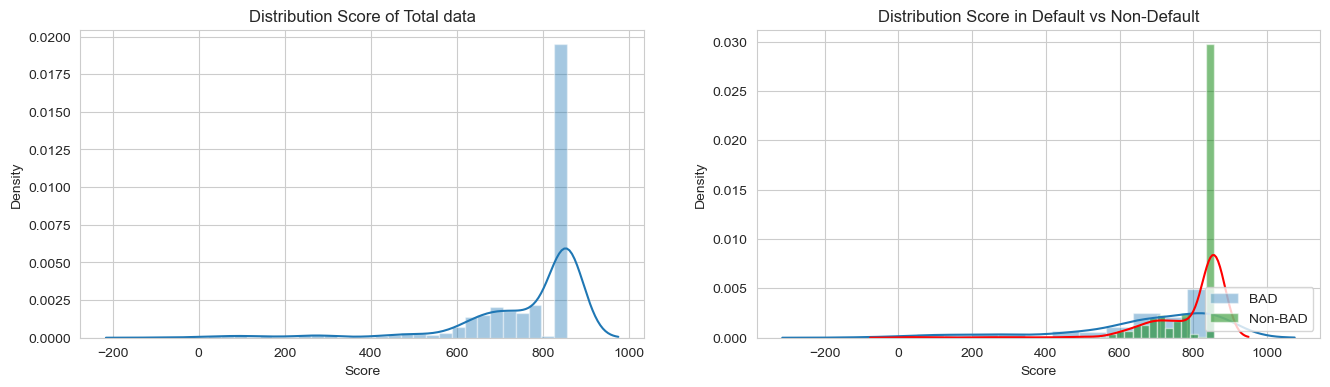

In [133]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data_split['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data_split[data_split['BAD']==1]['Score'], label='BAD')
sns.distplot(data_split[data_split['BAD']==0]['Score'], label='Non-BAD', 
             kde_kws={"color": "r"}, 
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')

In [134]:
# Define the list of usernames to process
usernames = ['nhant01', 'loanlt']


def _total_score(obs, df_score):
    scores = dict()
    for col in selected_cols:
        if obs[col].isnull().any():  # ignore missing values
            scores[col] = 0
        else:
            feature = obs[col].values[0]
            matches = (df_score['Columns'] == col) & (df_score['Features'] == feature)
            if matches.sum() == 0:  # no matching value found
                score = 0
            else:
                woe = df_score.loc[matches, 'WOE'].values[0]
                beta = df_score.loc[matches, 'Betas'].values[0]
                score = _CreditScore(beta, alpha, woe)
            scores[col] = score
    total_score = sum(scores.values())
    return scores, total_score

# Initialize an empty list to store the results
results = []

for A in usernames:
    b = loan_data[(loan_data['vnpostUserName'] == A)].tail(1).index[0]
    test_obs = loan_data[selected_cols].iloc[b:b+1, :]
    
    # Calculate the credit score
    scores, total_score = _total_score(test_obs, df_score)
    
    # Create a list of lists containing the table data
    table = [["Username", "Final total score"]]
    table.append([A, total_score])
    
    # Convert the table to a pandas DataFrame
    result_df = pd.DataFrame(table[1:], columns=table[0])
    
    # Append the result to the results list
    results.append(result_df)

# Concatenate the results into a single DataFrame
results_df = pd.concat(results, ignore_index=True, sort=False)
print(results_df)

# # Save the results to a CSV file
# results_df.to_csv("results.csv", index=False)


  Username  Final total score
0  nhant01         691.840556
1   loanlt         634.127427
